<a href="https://colab.research.google.com/github/wildhugecoconut/Classification-model/blob/main/Jaume_Preprocessing_FINAL__Entregable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importar train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/telecom_churn_TRAINTEST.csv")

In [ ]:
var_dic = pd.read_csv ('/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/variable_dictionary.csv')

In [ ]:
df.set_index('Customer_ID', inplace=True)


In [ ]:
print('Se define {Customer_ID} como indice')

Se define {Customer_ID} como indice


# EDA: Analisis Exploratorio

In [ ]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1000001 to 1090000
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null

## Distribución del target

In [ ]:
df['churn'].value_counts()

1    45800
0    44200
Name: churn, dtype: int64

In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]

array([[<Axes: title={'center': 'churn'}>]], dtype=object)

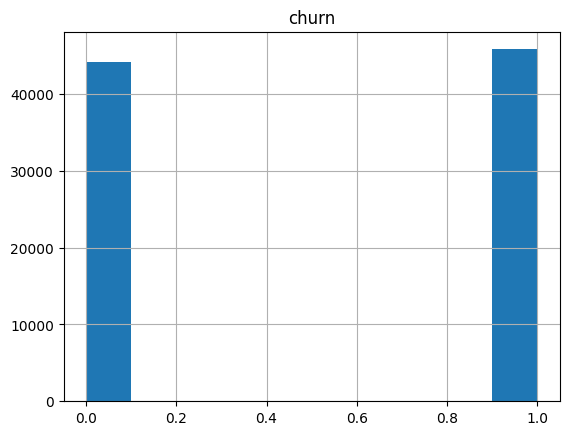

In [ ]:
df.hist('churn')

In [ ]:
proportion_churn = (df['churn'].value_counts()) / (len(df['churn'])) *100
proportion_churn

print(f'La distribucion de clientes que abandonan o permanecen en el servicio es proporcional')
print(f'{proportion_churn}')

La distribucion de clientes que abandonan o permanecen en el servicio es proporcional
1    50.888889
0    49.111111
Name: churn, dtype: float64


In [ ]:
df['churn']

Customer_ID
1000001    1
1000002    0
1000003    1
1000004    0
1000005    0
          ..
1089996    0
1089997    0
1089998    1
1089999    0
1090000    0
Name: churn, Length: 90000, dtype: int64

In [ ]:
X = df[features]

In [ ]:
y = df[target]

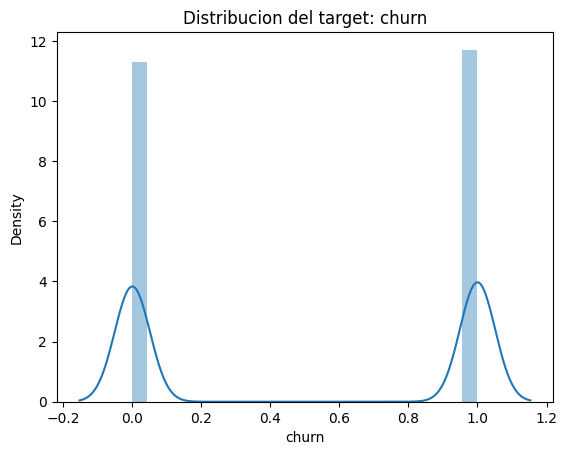

In [ ]:
sns.distplot(y)
plt.title('Distribucion del target: '+target)
plt.show()

# Se observa un churn en densidades equivalentes. Las distribucones en estandares y varianza se asemejan

## Analisis Univariable

* Distribucion de cada variable

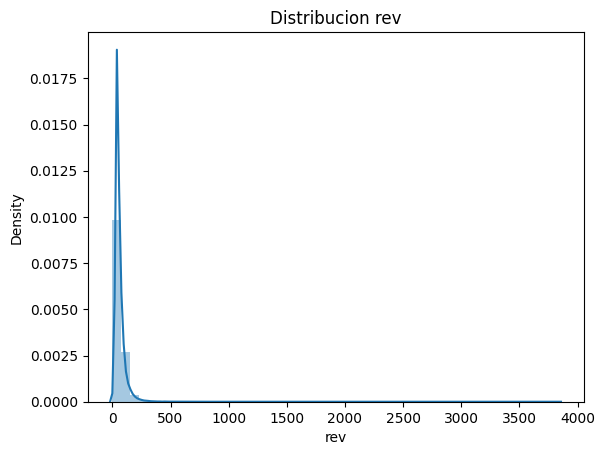

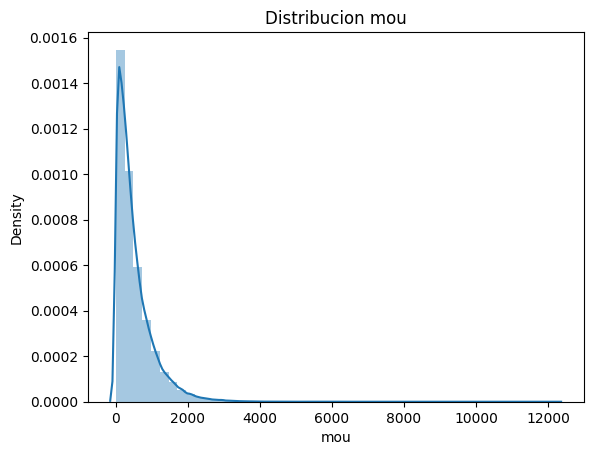

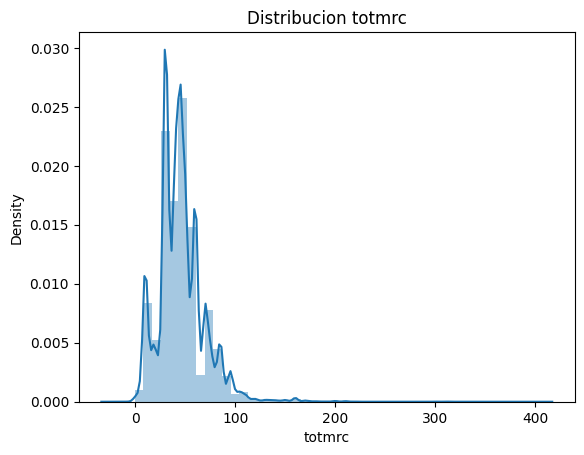

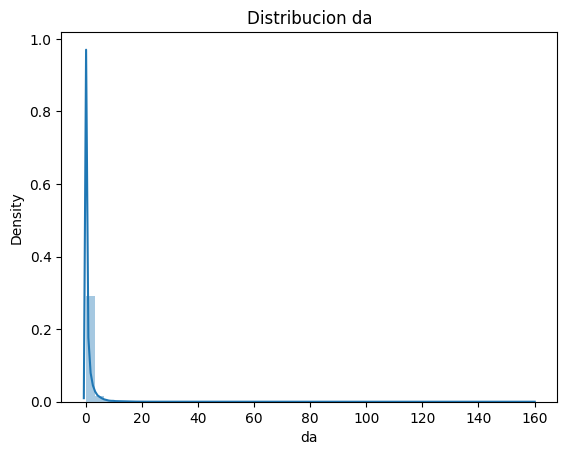

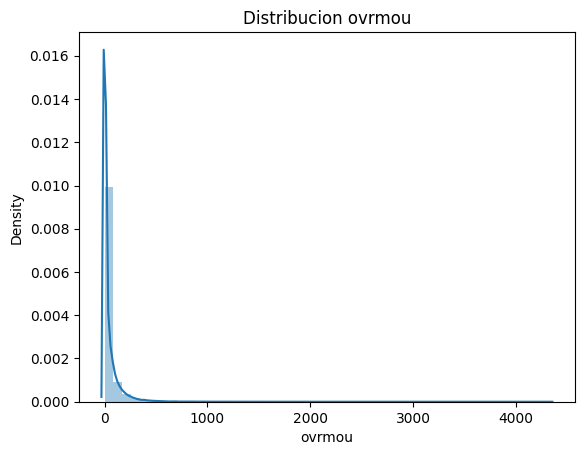

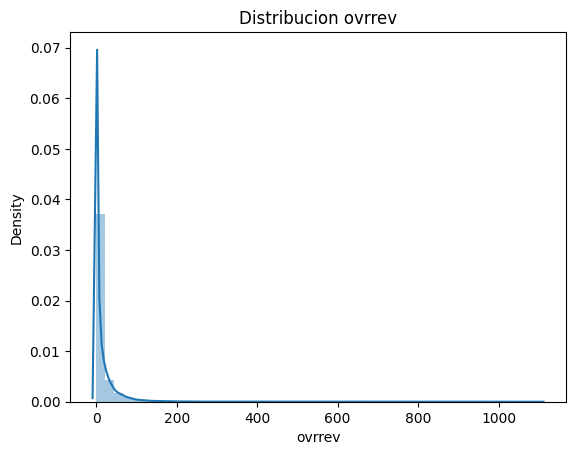

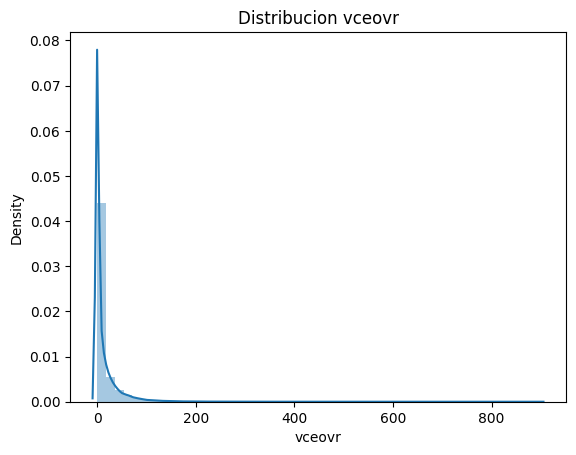

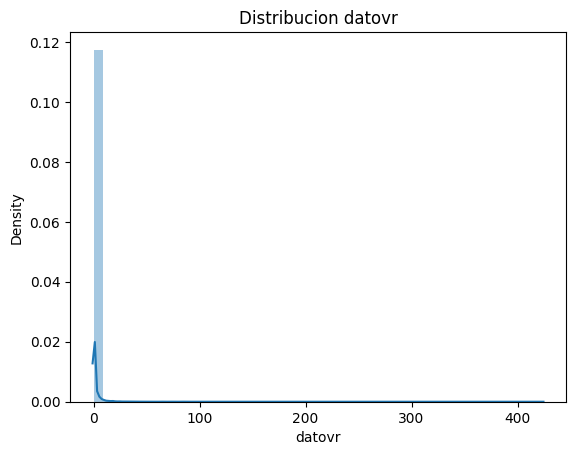

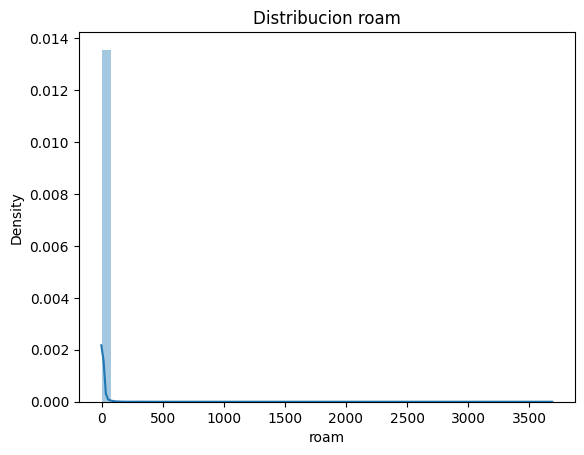

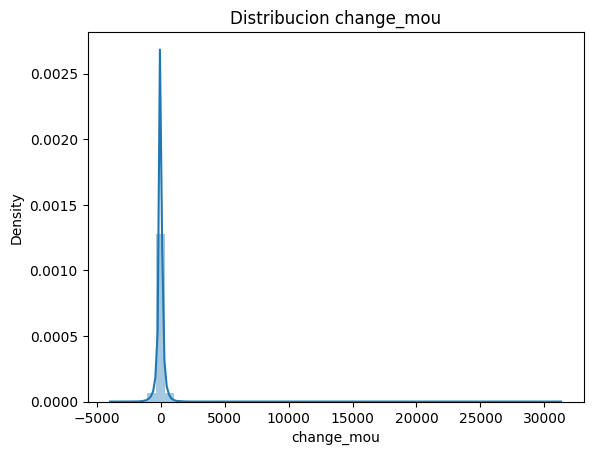

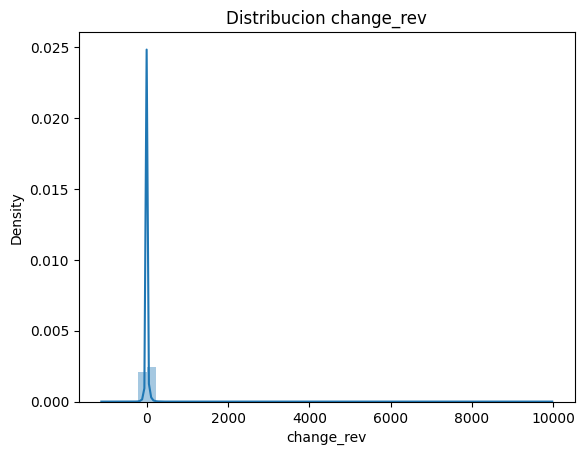

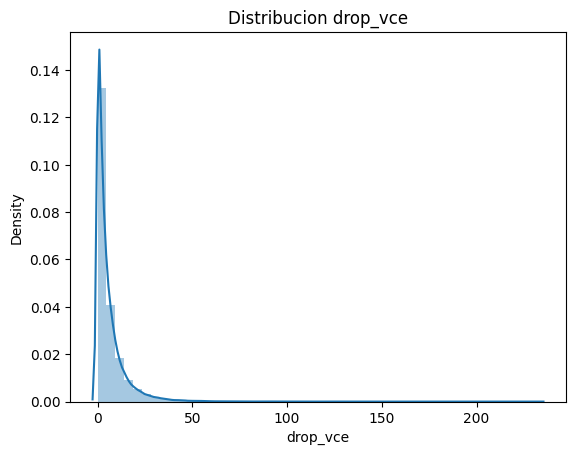

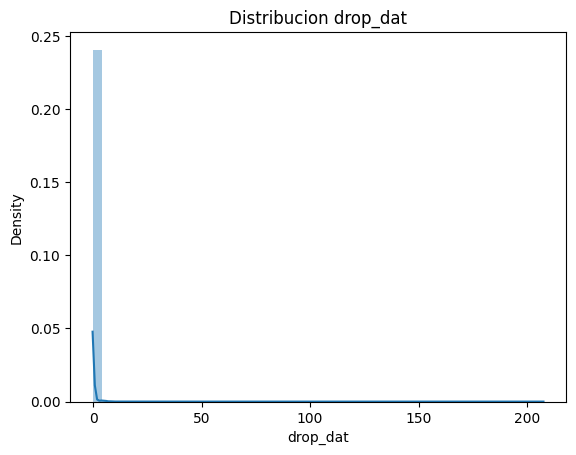

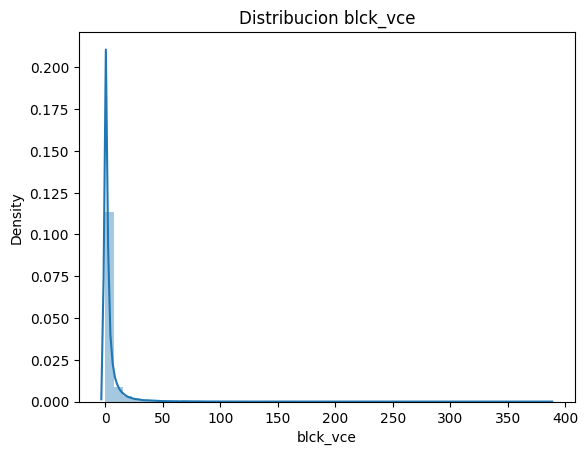

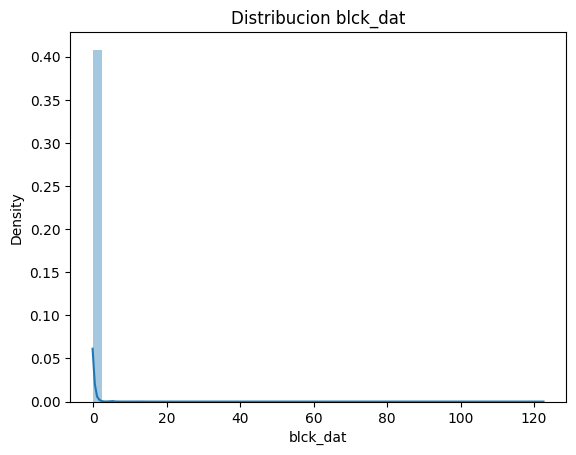

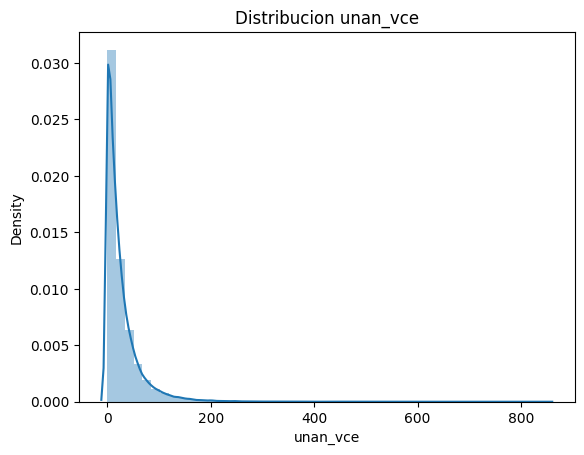

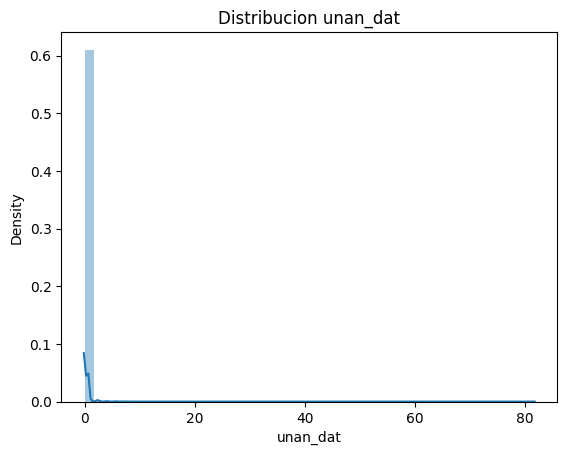

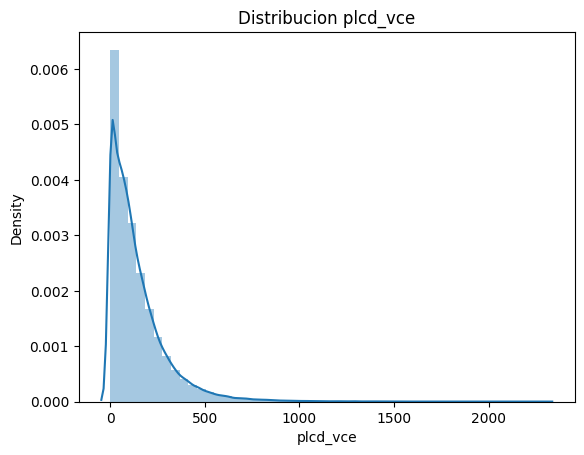

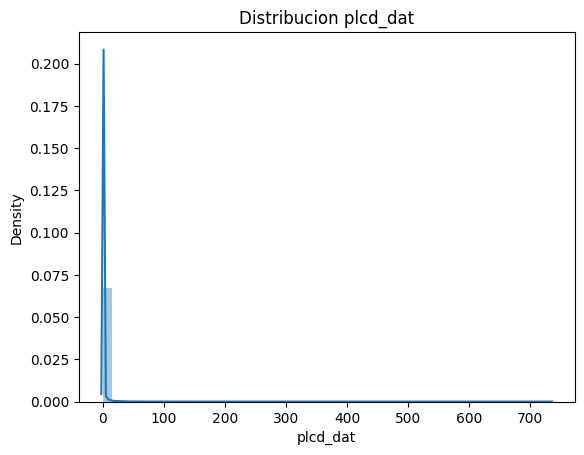

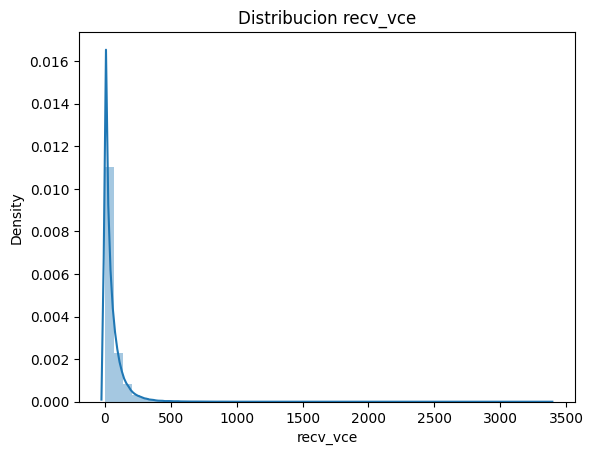

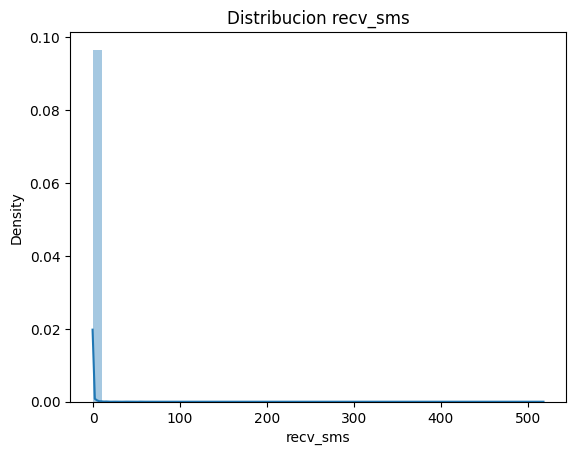

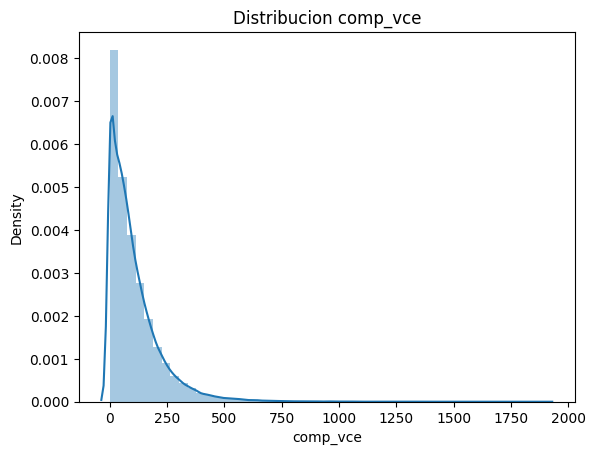

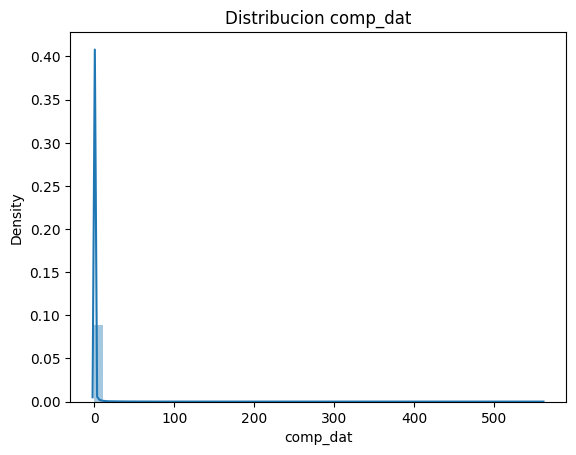

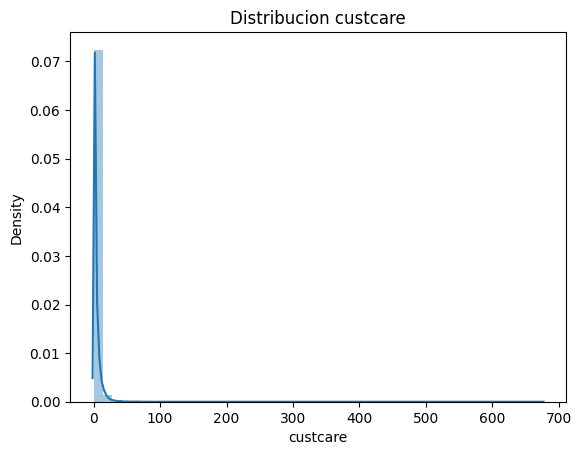

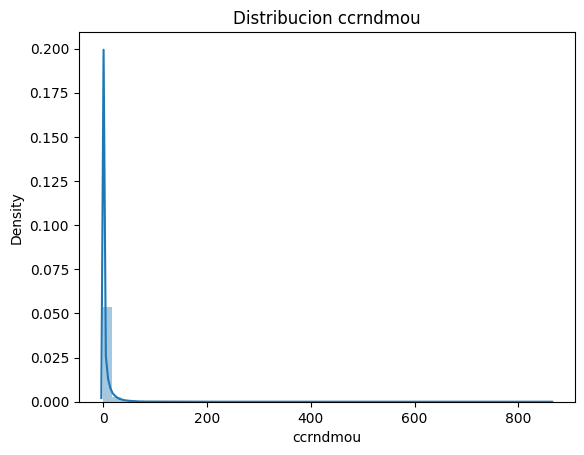

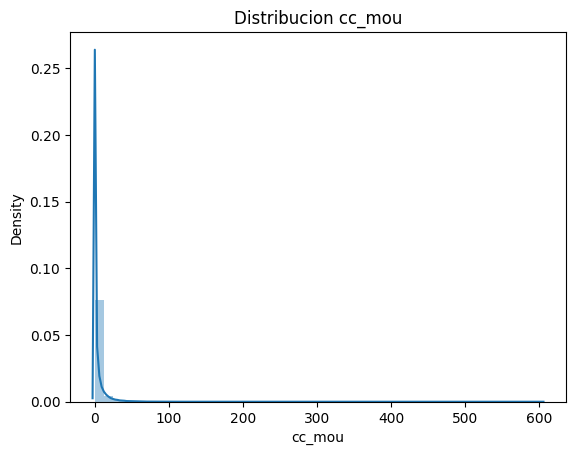

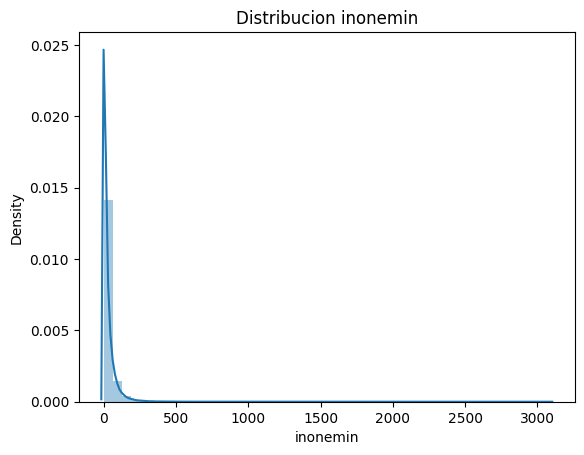

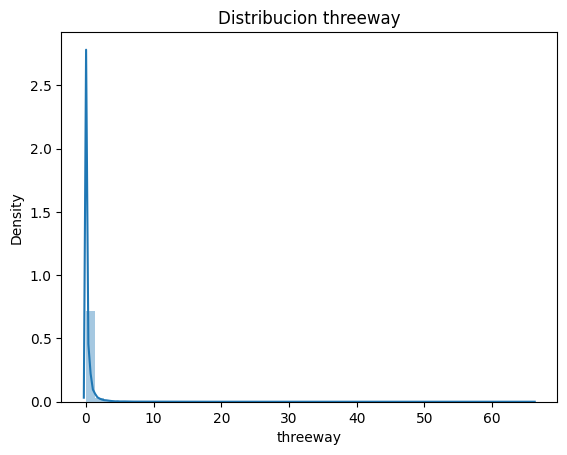

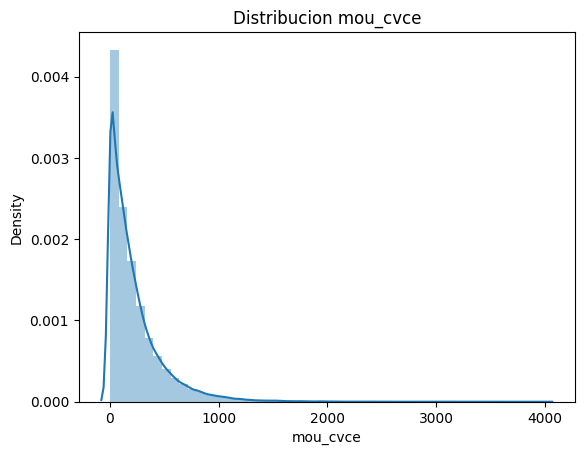

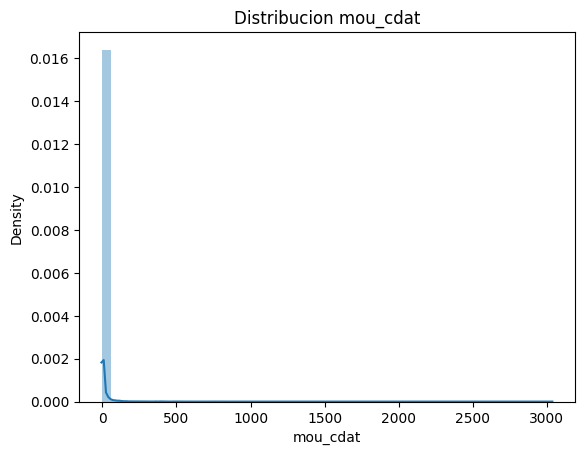

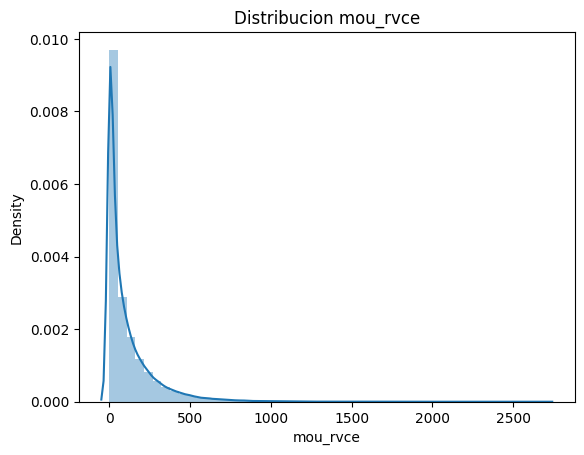

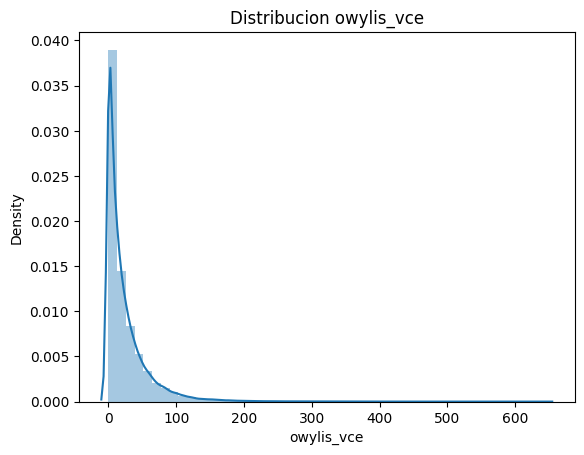

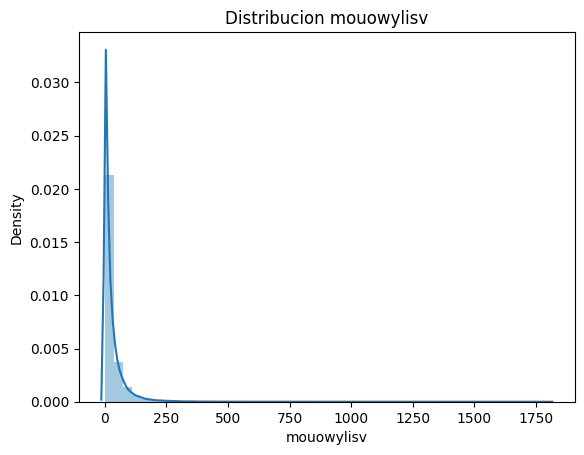

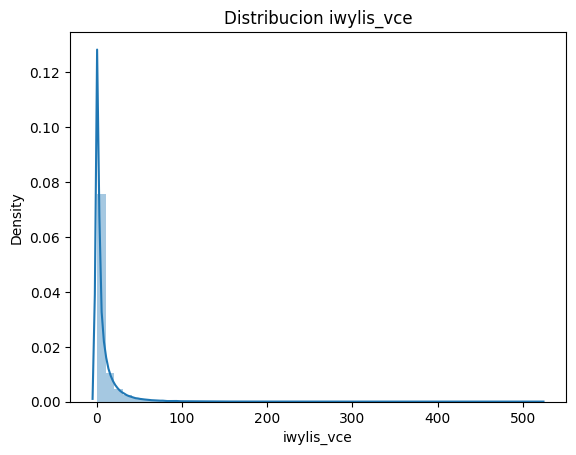

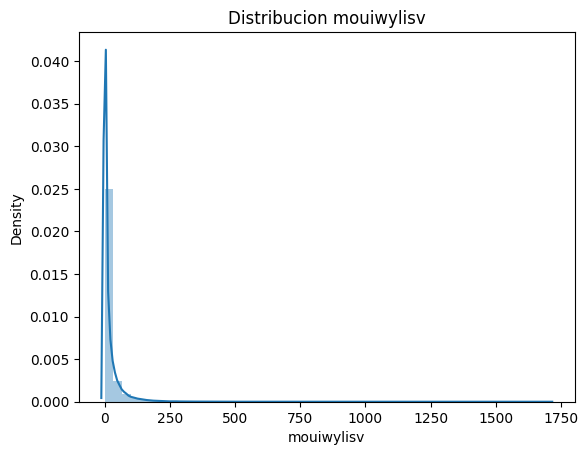

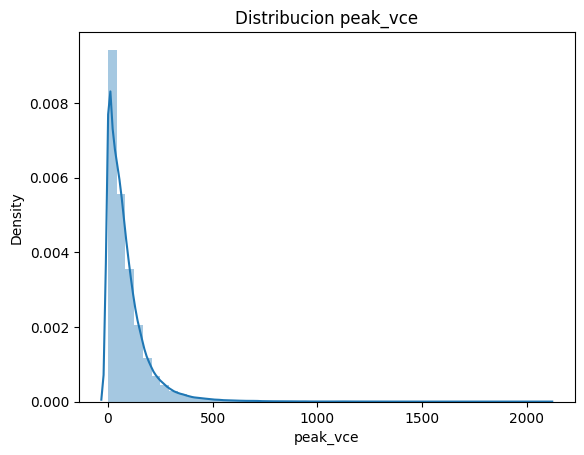

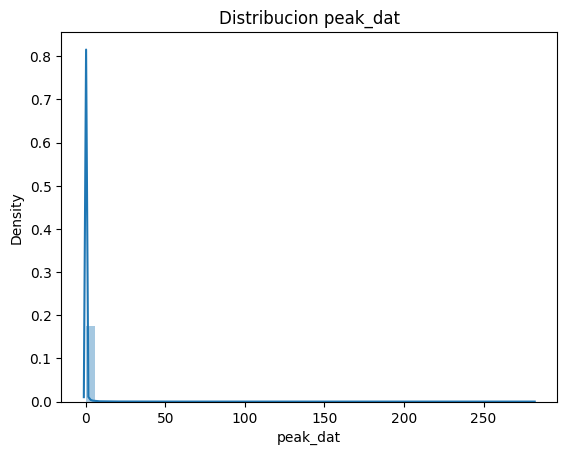

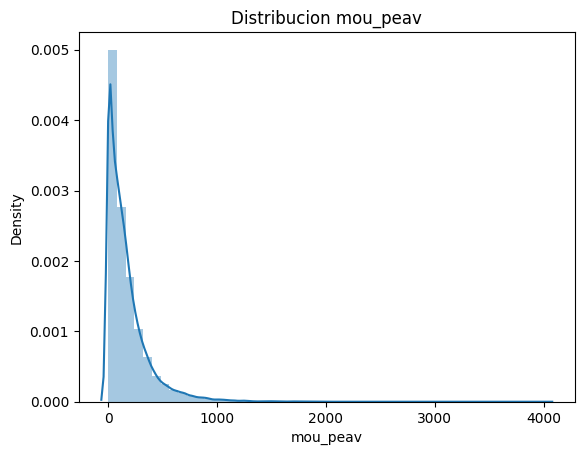

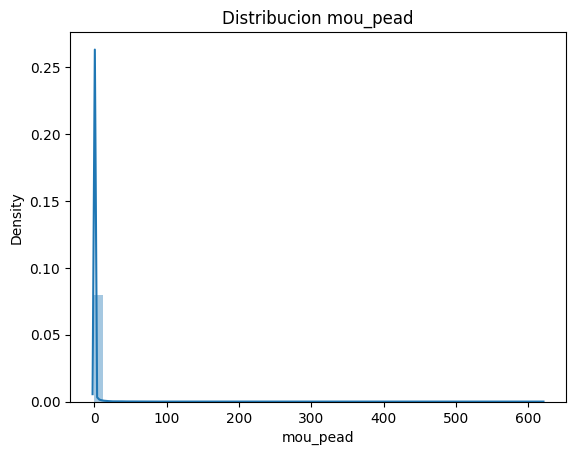

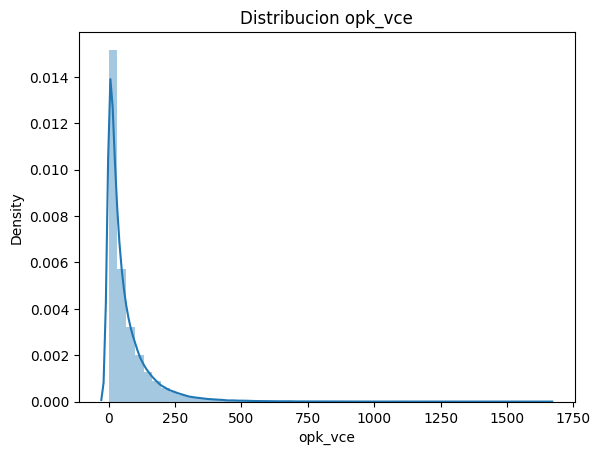

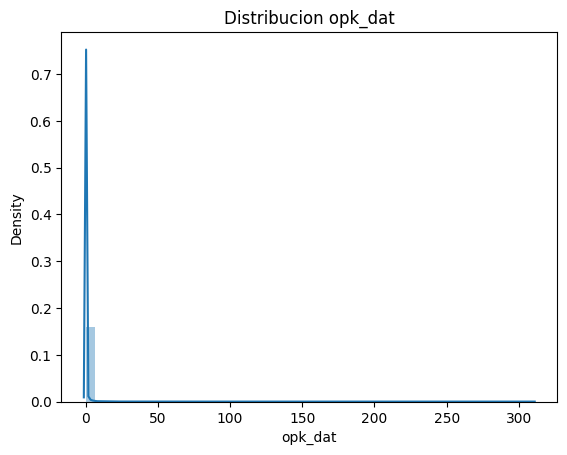

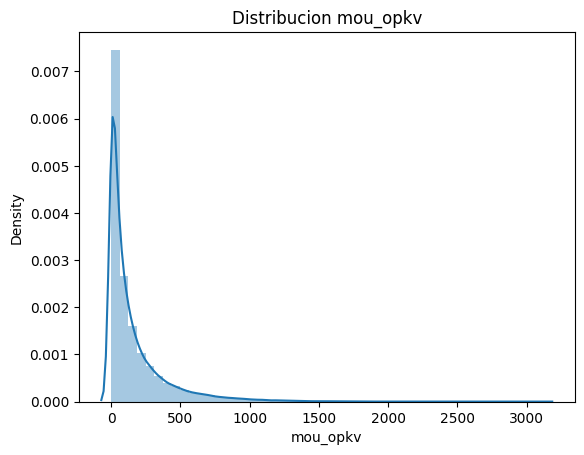

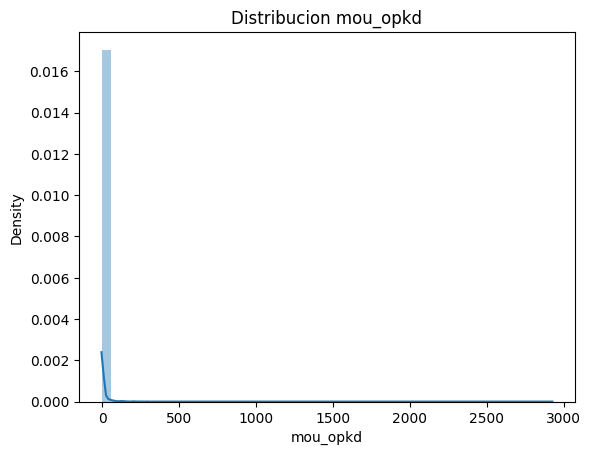

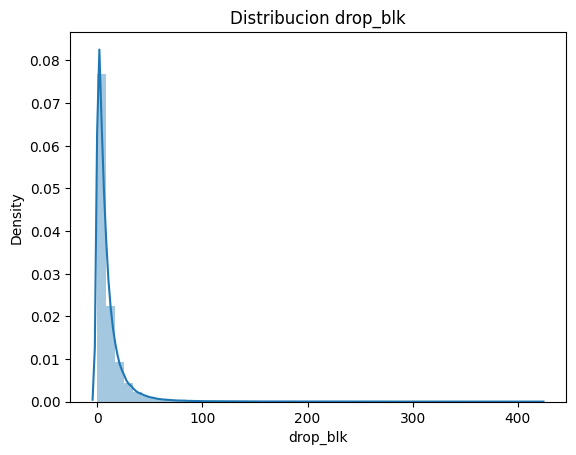

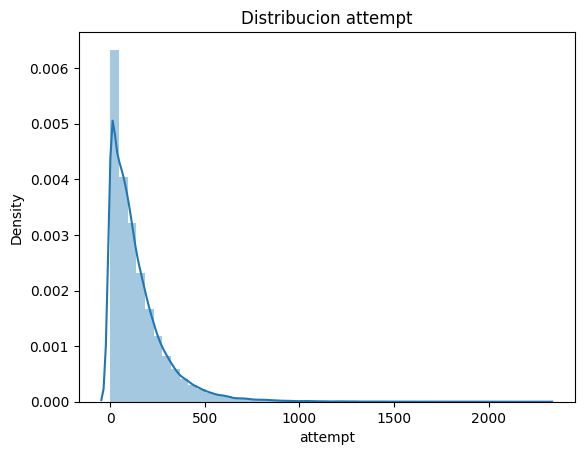

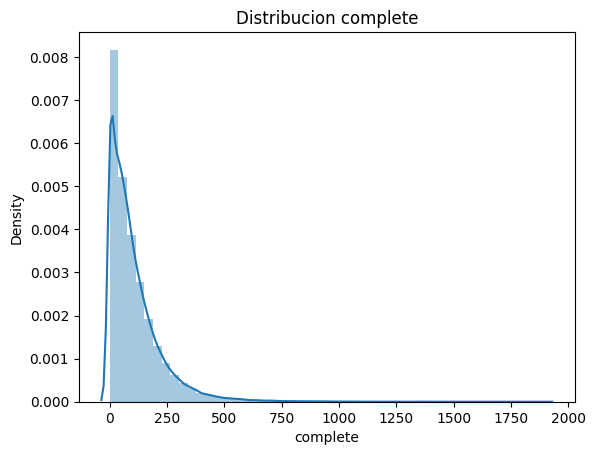

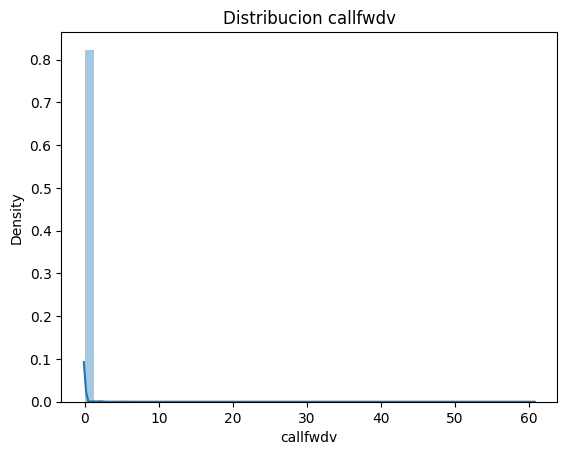

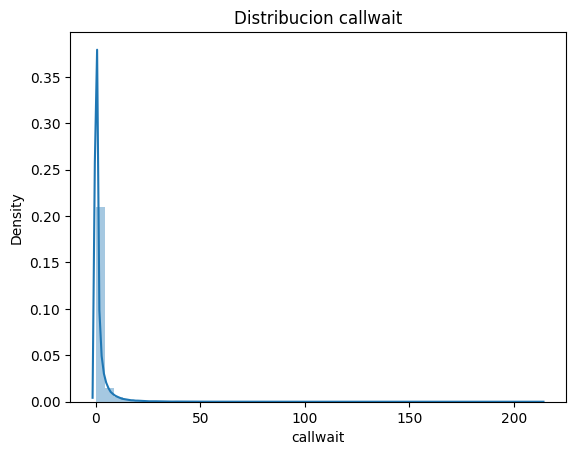

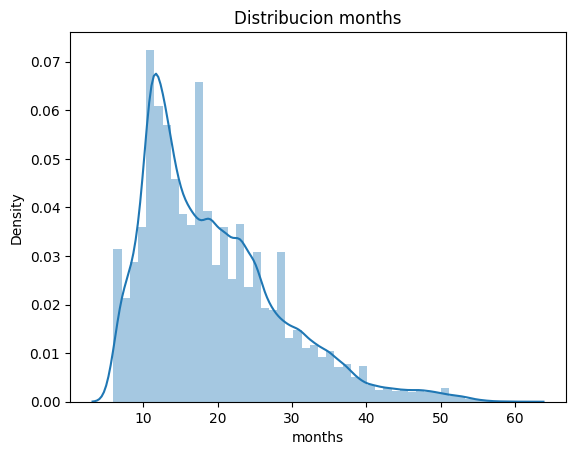

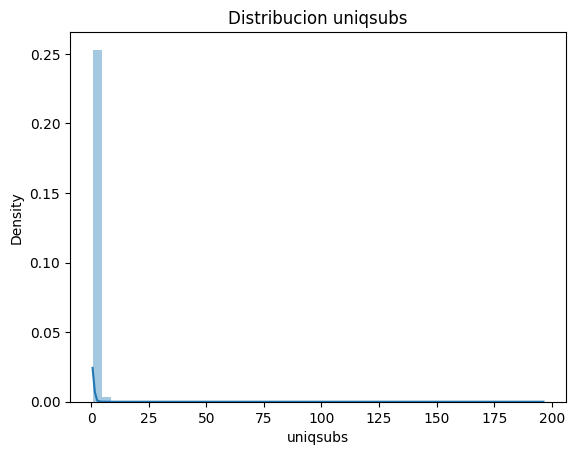

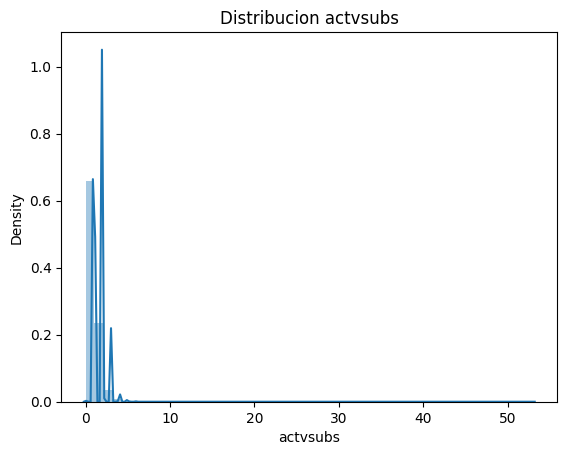

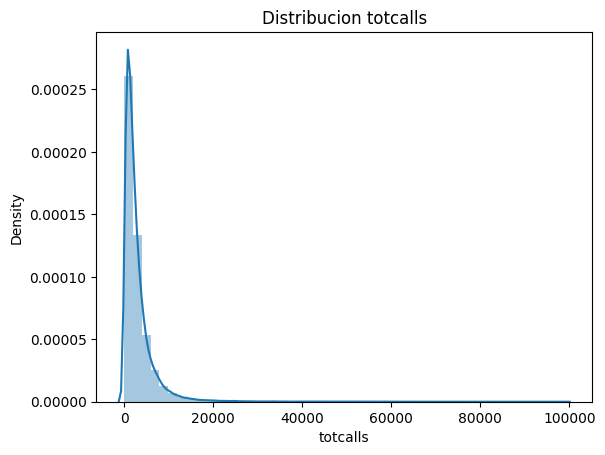

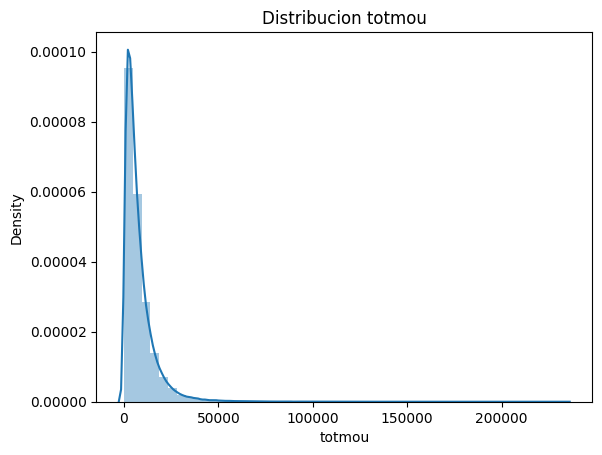

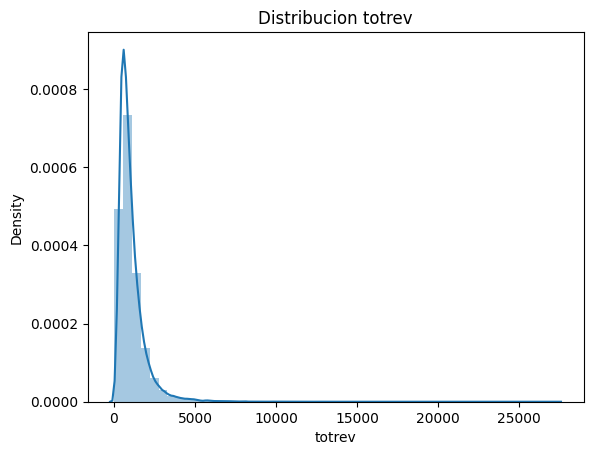

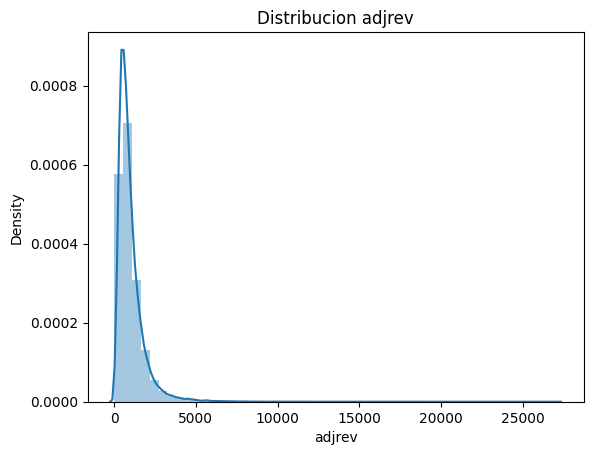

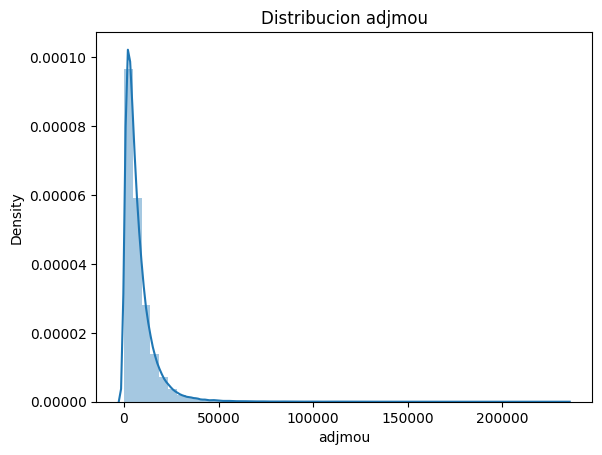

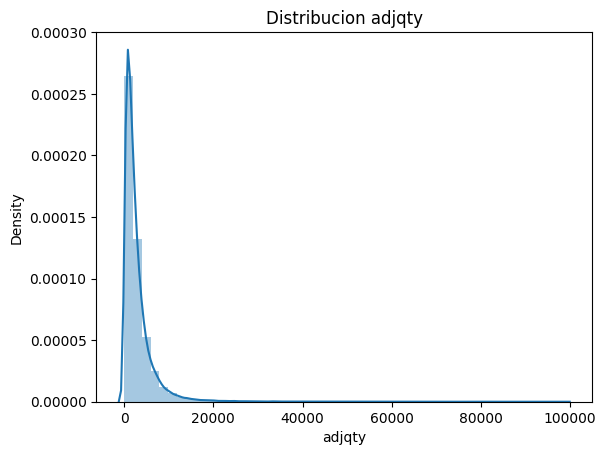

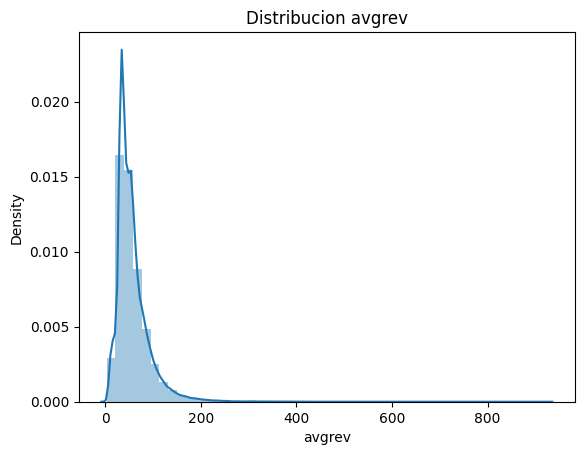

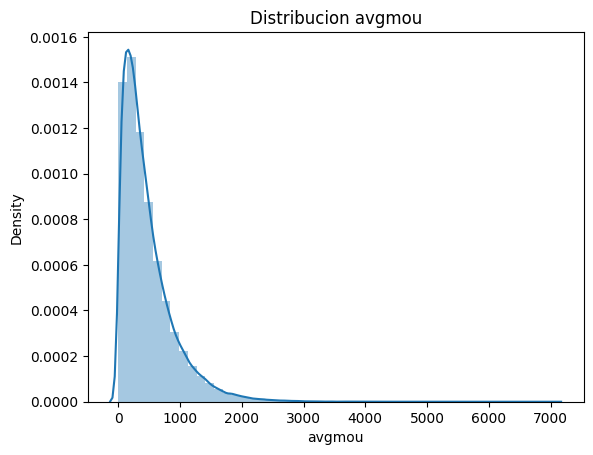

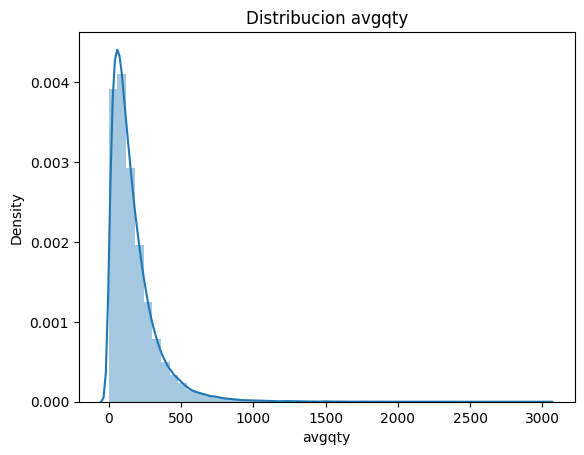

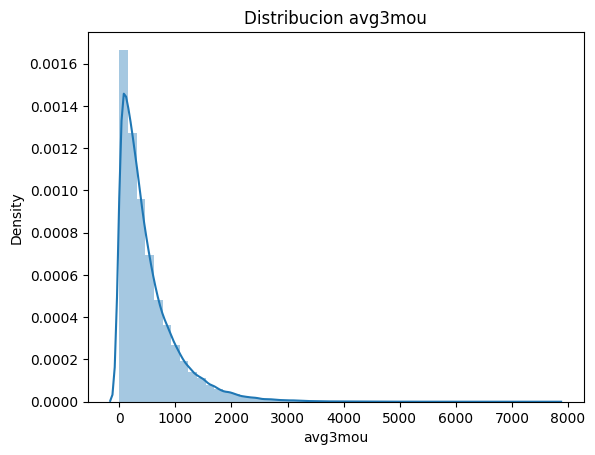

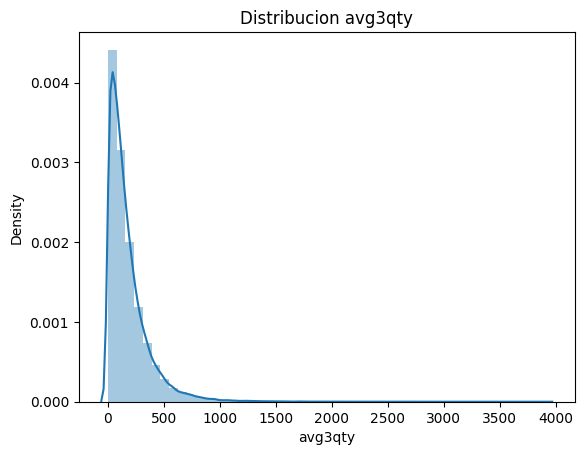

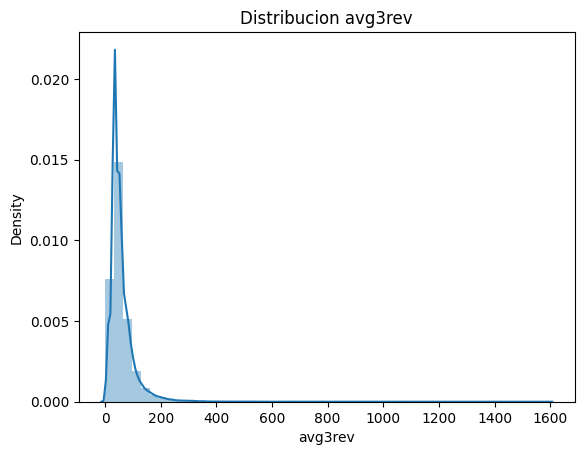

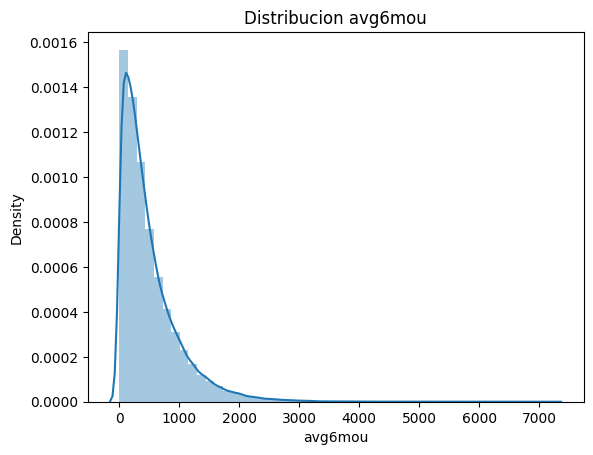

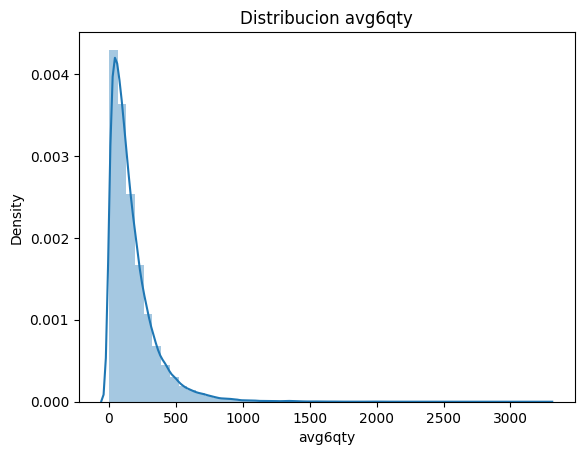

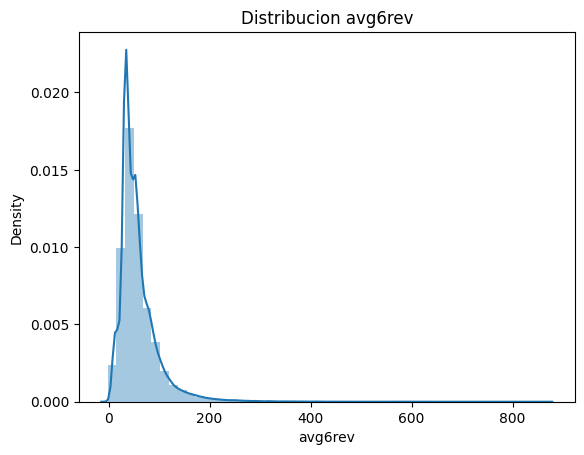

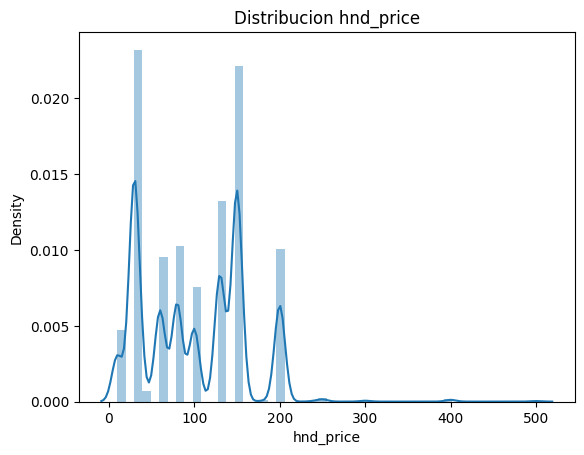

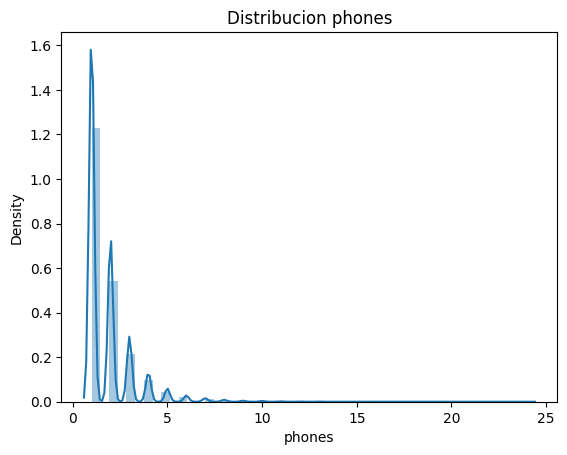

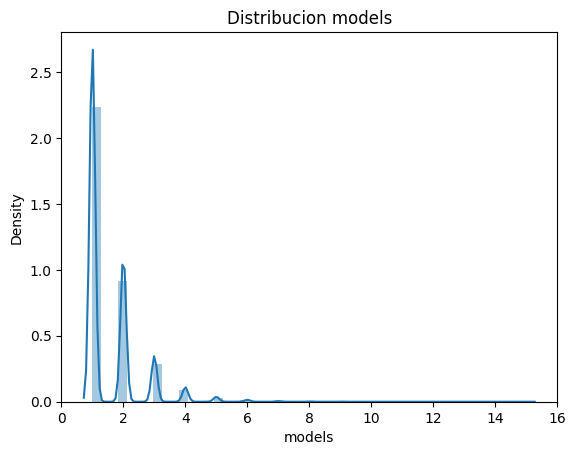

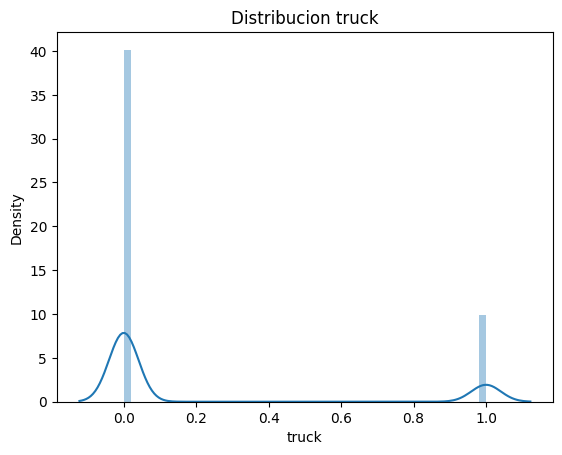

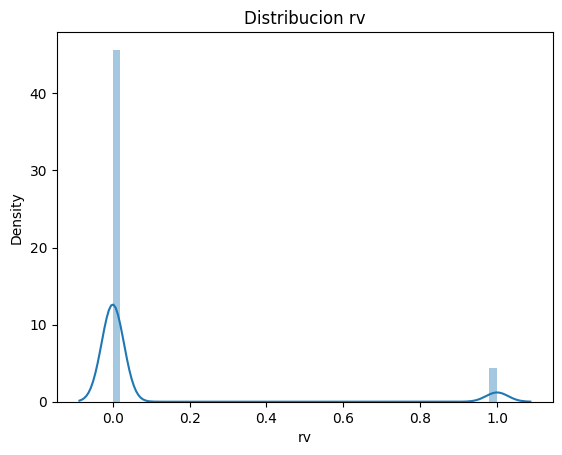

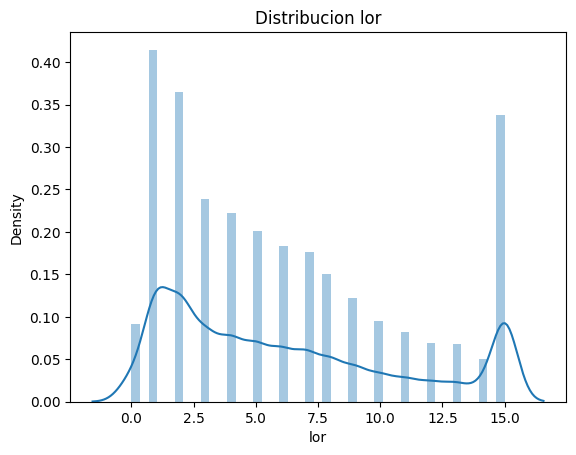

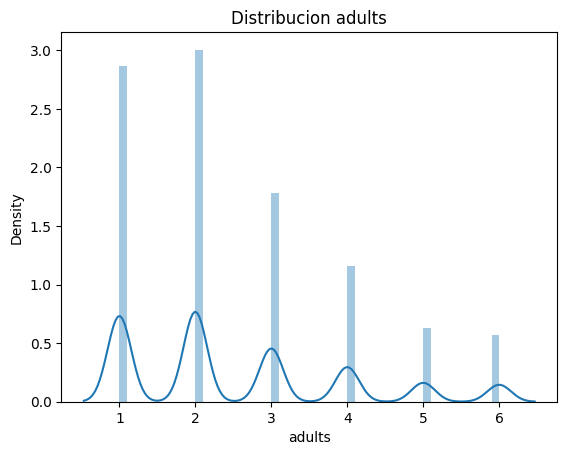

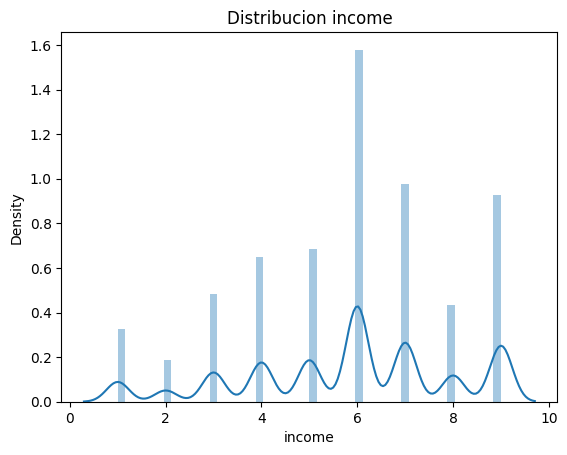

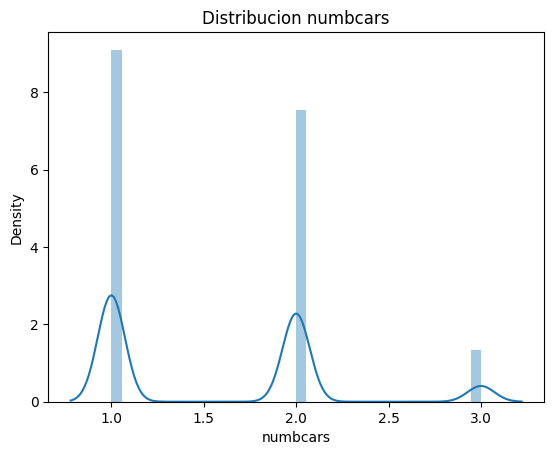

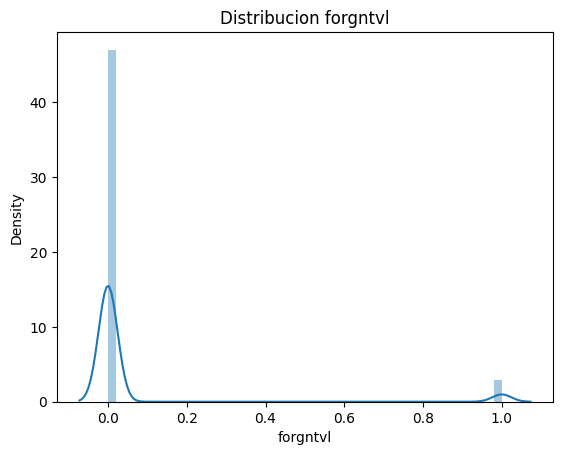

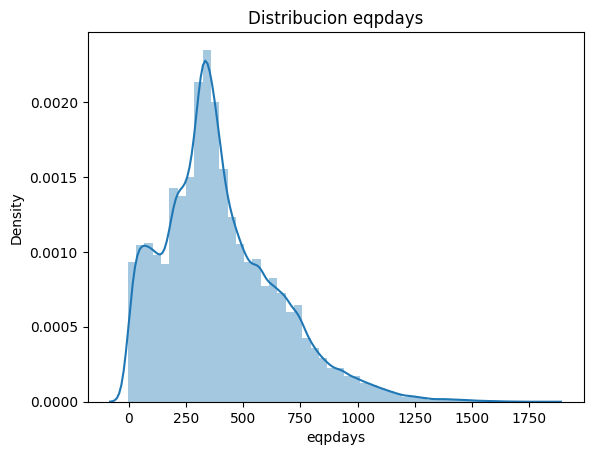

In [ ]:

for i in features:
 if df[i].dtype.kind=="i" or df[i].dtype.kind=="f":
  sns.distplot(X[i])
  plt.title('Distribucion '+ i)
  plt.show()

    #declaramos for loop para graficar variables numericas.

## Analisis Variable-Target

* Relacion target-variable: se revisaron las variables por diccionario para comprender cual seria mejor de relacionar con el target. Hemos propuesto 5 graficos para ver el comportamiento del target en relacion a:
1. Mean overage minutes of use (ovrmou) / churn
2. Mean number of monthly minutes of use (mou) / churn
3. Number of models issued (models) / churn
4. Estimated income (income) / churn

In [ ]:
var_dic

,Variable,Description
0,rev,Mean monthly revenue (charge amount)
1,mou,Mean number of monthly minutes of use
2,totmrc,Mean total monthly recurring charge
3,da,Mean number of directory assisted calls
4,ovrmou,Mean overage minutes of use
...,...,...
95,kid11_15,Child 11 - 15 years of age in household
96,kid16_17,Child 16 - 17 years of age in household
97,creditcd,Credit card indicator
98,eqpdays,Number of days (age) of current equipment


In [ ]:
var_dic.iloc[4,:]

#localizamos nombre de la variable con su posicionamiento de index columna y fila

Variable                              ovrmou
 Description     Mean overage minutes of use
Name: 4, dtype: object

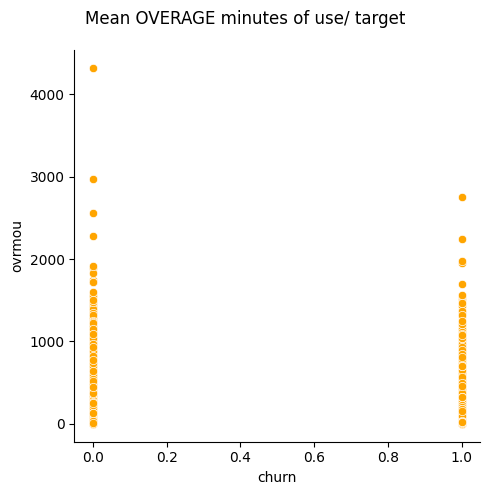

In [ ]:
f = sns.relplot(x='churn', y='ovrmou', data= df, color = 'orange')
f.fig.suptitle("Mean OVERAGE minutes of use/ target")
f.fig.subplots_adjust(top = 0.9)

#se observan valores similares de tiempo de uso excesivo (overage) del servicio en ambos grupos, por lo que no seria una variable
#que nos ayude a determinar si es una causa de abandono. El valor que se encuentra por encima de 4000 min, podria
#tratarse de un outlier

In [ ]:
var_dic.iloc[1,:]

Variable                                           mou
 Description     Mean number of monthly minutes of use
Name: 1, dtype: object

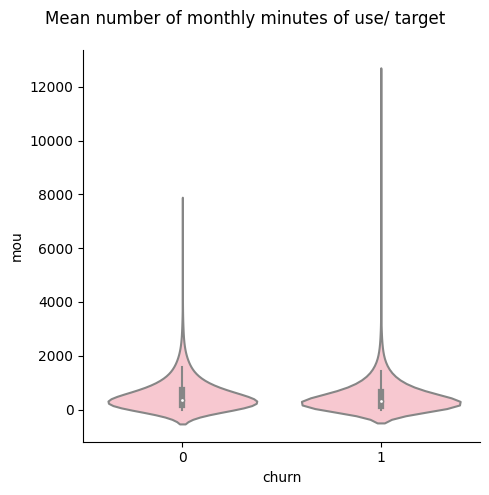

In [ ]:
a = sns.catplot(x='churn', y='mou', kind='violin', split=True, bw=.50, color='pink', data= df)
a.fig.suptitle("Mean number of monthly minutes of use/ target")
a.fig.subplots_adjust(top = 0.9)

# al relacion el tiempo de uso promedio del servicio al mes, se observa un comportamiento simil en ambos
#grupos de clientes. La distribucion de densidades dada por el 'ancho' del violin, tambien se
#asemejan . Esta variable podria no tener impacto al momento de entender la razon de abandono.

In [ ]:
var_dic.iloc[76, :]

Variable                          models
 Description     Number of models issued
Name: 76, dtype: object

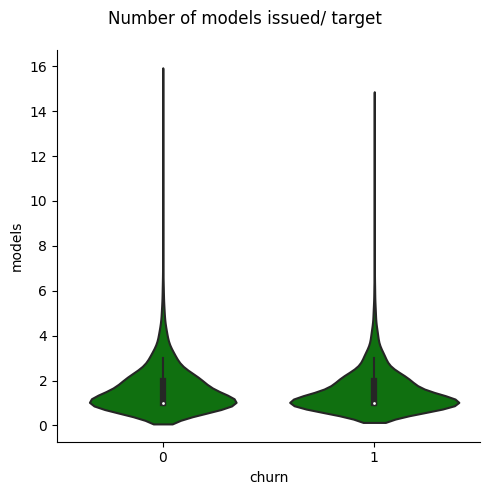

In [ ]:
a = sns.catplot(x='churn', y='models', kind='violin', split=True, bw=.50, color='green', data= df)
a.fig.suptitle("Number of models issued/ target")
a.fig.subplots_adjust(top = 0.9)

#el numero de modelos adquiridos durante la permanencia del cliente en ambos grupos es similar.
#esta variable, no nos aporta informacion valiosa para entender el motivo de abandono.

In [ ]:
var_dic.iloc[86, :]

Variable                   income
 Description     Estimated income
Name: 86, dtype: object

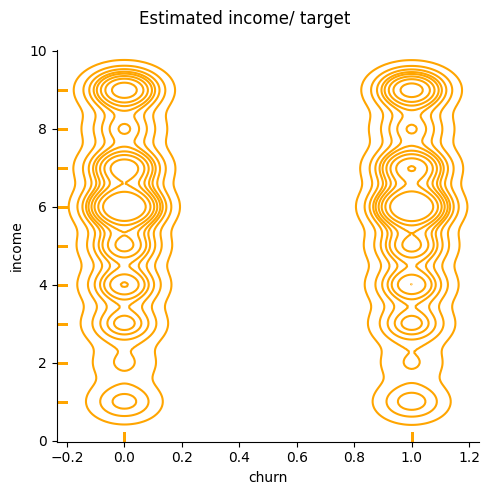

In [ ]:
w = sns.displot(x='churn', y='income', color='orange', rug = True, kind = 'kde' , data= df)
w.fig.suptitle("Estimated income/ target")
w.fig.subplots_adjust(top = 0.9)

#podemos observar que el ingreso estimado de los clientes que abandonan o permanecen en el servicio
#es muy parecido, de modo que su capacidad economica tampoco es una variable que nos ayude a
#comprender el problema .

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
df.shape

(90000, 99)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1000001 to 1090000
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null

In [ ]:
df.isnull().sum()

rev          134
mou          134
totmrc       134
da           134
ovrmou       134
            ... 
kid6_10     1451
kid11_15    1451
kid16_17    1451
creditcd    1451
eqpdays        1
Length: 99, dtype: int64

Comenzamos imputacion de nulos por orden de columna

In [ ]:
var_dic.iloc[0,:]

Variable                                          rev
 Description     Mean monthly revenue (charge amount)
Name: 0, dtype: object

In [ ]:
df['rev'].isnull().sum()

134

In [ ]:
df['rev'].max()


3843.2625

In [ ]:
df['rev'].min()

-5.8625

In [ ]:
#como se trata de dinero, revisamos valores por debajo de Cero ya que no tendrian sentido

In [ ]:
df['rev'] = np.where(df['rev']<0, df['rev'] == 0, df['rev'])

In [ ]:
df['rev'].min()

0.0

In [ ]:
df['rev'].fillna(-999, inplace = True)

In [ ]:
df['rev'].isnull().sum()

0

array([[<Axes: title={'center': 'rev'}>]], dtype=object)

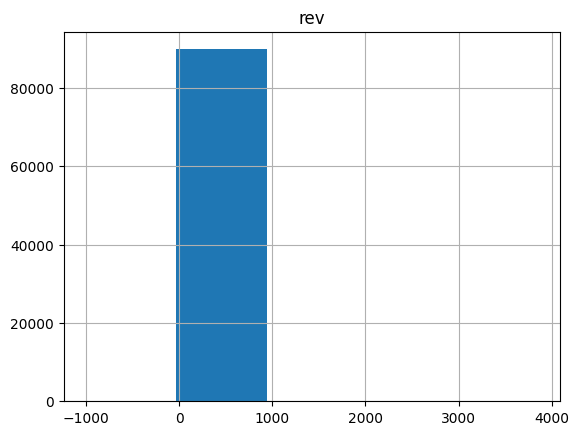

In [ ]:
df.hist('rev', bins = 5)

In [ ]:
var_dic.iloc[1,:]

Variable                                           mou
 Description     Mean number of monthly minutes of use
Name: 1, dtype: object

In [ ]:
df['mou'].isnull().sum()

134

In [ ]:
df['mou'].max()

12206.75

In [ ]:
df['mou'].min()

0.0

In [ ]:
df['mou'].fillna(-999, inplace = True)

In [ ]:
df['mou'].isnull().sum()

0

In [ ]:
#totmrc : 	Mean total monthly recurring charge

In [ ]:
var_dic.iloc[2,:]

Variable                                      totmrc
 Description     Mean total monthly recurring charge
Name: 2, dtype: object

In [ ]:
df['totmrc'].max()

409.99

In [ ]:
df['totmrc'].min()

-26.915

In [ ]:
df['totmrc'] = np.where(df['totmrc']<0, df['totmrc'] == 0, df['totmrc'])

In [ ]:
df['totmrc'].isnull().sum()

134

In [ ]:
df['totmrc'].fillna(-999, inplace = True)

In [ ]:
df['totmrc'].isnull().sum()

0

In [ ]:
#columna 3 : da	- Mean number of directory assisted calls

In [ ]:
var_dic.iloc[3, :]

Variable                                              da
 Description     Mean number of directory assisted calls
Name: 3, dtype: object

In [ ]:
df['da'].isnull().sum()

134

In [ ]:
df['da'].max()

159.39

In [ ]:
df['da'].min()

0.0

In [ ]:
df['da'].fillna(-999, inplace = True)

In [ ]:
df['da'].isnull().sum()

0

In [ ]:
#columna 4 : 4	ovrmou	Mean overage minutes of use

In [ ]:
var_dic.iloc[4, :]

Variable                              ovrmou
 Description     Mean overage minutes of use
Name: 4, dtype: object

In [ ]:
df['ovrmou'].isnull().sum()

134

In [ ]:
df['ovrmou'].max()

4320.75

In [ ]:
df['ovrmou'].min()

0.0

In [ ]:
df['ovrmou'].fillna(-999, inplace = True)

In [ ]:
df['ovrmou'].isnull().sum()

0

In [ ]:
#columna 5 : ovrrev : Mean overage revenue

In [ ]:
var_dic.iloc[5, :]

Variable                       ovrrev
 Description     Mean overage revenue
Name: 5, dtype: object

In [ ]:
df['ovrrev'].max()

1102.4

In [ ]:
df['ovrrev'].min()

0.0

In [ ]:
df['ovrrev'].isnull().sum()

134

In [ ]:
df['ovrrev'].fillna(-999, inplace = True)

In [ ]:
df['ovrrev'].isnull().sum()

0

In [ ]:
#columna 6 : vceovr : Mean revenue of voice overage

In [ ]:
var_dic.iloc[6, :]

Variable                                vceovr
 Description     Mean revenue of voice overage
Name: 6, dtype: object

In [ ]:
df['vceovr'].isnull().sum()

134

In [ ]:
df['vceovr'].max()

896.0875

In [ ]:
df['vceovr'].min()

0.0

In [ ]:
df['vceovr'].fillna(-999, inplace = True)

In [ ]:
df['vceovr'].isnull().sum()

0

In [ ]:
#columna 7 : datovr : Mean revenue of data overage

In [ ]:
var_dic.iloc[7, :]

Variable                               datovr
 Description     Mean revenue of data overage
Name: 7, dtype: object

In [ ]:
df['datovr'].max()

423.54

In [ ]:
df['datovr'].min()

0.0

In [ ]:
df['datovr'].isnull().sum()

134

In [ ]:
df['datovr'].fillna(-999, inplace = True)

In [ ]:
df['datovr'].isnull().sum()

0

In [ ]:
#columna 8 : roam : Mean number of roaming calls

In [ ]:
var_dic.iloc[8,:]

Variable                                 roam
 Description     Mean number of roaming calls
Name: 8, dtype: object

In [ ]:
df['roam'].max()

3685.2

In [ ]:
df['roam'].min()

0.0

In [ ]:
df['roam'].isnull().sum()

134

In [ ]:
df['roam'].fillna(-999, inplace = True)

In [ ]:
df['roam'].isnull().sum()

0

In [ ]:
#columna 9: change_mou : Percentage change in monthly minutes of use

In [ ]:
var_dic.iloc[9, :]

Variable                                               change_mou
 Description     Percentage change in monthly minutes of use v...
Name: 9, dtype: object

In [ ]:
df['change_mou'].max()

31219.25

In [ ]:
df['change_mou'].min()    #no son outliers: puede ser que sea una diferencia negativa de uso en minutos.

-3875.0

In [ ]:
df['change_mou'].isnull().sum()

595

In [ ]:
#df2 = df.copy()

In [ ]:
df['change_mou'].fillna(-999, inplace = True)

In [ ]:
df['change_mou'].isnull().sum()

0

In [ ]:
#columna 10 : change_rev : Percentage change in monthly revenue vs previ

In [ ]:
var_dic.iloc[10, :]

Variable                                               change_rev
 Description     Percentage change in monthly revenue vs previ...
Name: 10, dtype: object

In [ ]:
df['change_rev'].isnull().sum()

595

In [ ]:
df['change_rev'].max()

9963.6575

In [ ]:
df['change_rev'].min()

-1107.74

In [ ]:
df['change_rev'].fillna(-999, inplace = True)

In [ ]:
df['change_rev'].isnull().sum()

0

Aqui terminamos de imputar nulos de las primeras 11 columnas que presentaban NaNs.

Continuamos con las cols de 11-33 revisando outliers . No presentan valores nulos

In [ ]:
#columna 11  : Mean number of dropped (failed) voice calls

In [ ]:
var_dic.iloc[11, :]

Variable                                            drop_vce
 Description     Mean number of dropped (failed) voice calls
Name: 11, dtype: object

In [ ]:
df['drop_vce'].min() #no hay outliers

0.0

In [ ]:
df['drop_vce'].max()

232.6666667

In [ ]:
df['drop_vce'].isnull().sum()

0

In [ ]:
#columna 12: drop_dat : Mean number of dropped (failed) data calls

In [ ]:
var_dic.iloc[12, :]

Variable                                           drop_dat
 Description     Mean number of dropped (failed) data calls
Name: 12, dtype: object

In [ ]:
df['drop_dat'].max()

207.3333333

In [ ]:
df['drop_dat'].min()

0.0

In [ ]:
#columna 13: blck_vce: Mean number of blocked (failed) voice calls

In [ ]:
var_dic.iloc[13, :]

Variable                                            blck_vce
 Description     Mean number of blocked (failed) voice calls
Name: 13, dtype: object

In [ ]:
df['blck_vce'].max()

385.3333333

In [ ]:
df['blck_vce'].min()

0.0

In [ ]:
#columna 14 : blck_dat : Mean number of blocked (failed) data calls

In [ ]:
var_dic.iloc[14,:]

Variable                                           blck_dat
 Description     Mean number of blocked (failed) data calls
Name: 14, dtype: object

In [ ]:
df['blck_dat'].max()

122.3333333

In [ ]:
df['blck_dat'].min()

0.0

In [ ]:
#columa 15: unan_vce: Mean number of unanswered voice calls

In [ ]:
var_dic.iloc[15,:]

Variable                                      unan_vce
 Description     Mean number of unanswered voice calls
Name: 15, dtype: object

In [ ]:
df['unan_vce'].max()

848.6666667

In [ ]:
df['unan_vce'].min()

0.0

In [ ]:
#columna 16 : Mean number of unanswered data calls

In [ ]:
var_dic.iloc[16, :]

Variable                                     unan_dat
 Description     Mean number of unanswered data calls
Name: 16, dtype: object

In [ ]:
df['unan_dat'].max()

81.66666667

In [ ]:
df['unan_dat'].min()

0.0

In [ ]:
#columa 17 : plcd_vce : Mean number of attempted voice calls placed

In [ ]:
var_dic.iloc[17, :]

Variable                                            plcd_vce
 Description     Mean number of attempted voice calls placed
Name: 17, dtype: object

In [ ]:
df['plcd_vce'].max()

2289.0

In [ ]:
df['plcd_vce'].min()

0.0

In [ ]:
#columa 18 : plcd_dat : Mean number of attempted data calls placed

In [ ]:
var_dic.iloc[18,:]

Variable                                           plcd_dat
 Description     Mean number of attempted data calls placed
Name: 18, dtype: object

In [ ]:
df['plcd_dat'].max()

733.6666667

In [ ]:
df['plcd_dat'].min()

0.0

In [ ]:
# columna 19 :

In [ ]:
var_dic.iloc[19,:]

Variable                                    recv_vce
 Description     Mean number of received voice calls
Name: 19, dtype: object

In [ ]:
df['recv_vce'].max()

3369.333333

In [ ]:
df['recv_vce'].min()

0.0

In [ ]:
#reviso las restantes con histograma

In [ ]:
cols_a_revisar = ['recv_sms', 'comp_vce', 'comp_dat',
                  'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway',
                  'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce',
                  'mouowylisv']


[[<Axes: title={'center': 'recv_sms'}>]]
[[<Axes: title={'center': 'comp_vce'}>]]
[[<Axes: title={'center': 'comp_dat'}>]]
[[<Axes: title={'center': 'custcare'}>]]
[[<Axes: title={'center': 'ccrndmou'}>]]
[[<Axes: title={'center': 'cc_mou'}>]]
[[<Axes: title={'center': 'inonemin'}>]]
[[<Axes: title={'center': 'threeway'}>]]
[[<Axes: title={'center': 'threeway'}>]]
[[<Axes: title={'center': 'mou_cvce'}>]]
[[<Axes: title={'center': 'mou_cdat'}>]]
[[<Axes: title={'center': 'mou_rvce'}>]]
[[<Axes: title={'center': 'owylis_vce'}>]]
[[<Axes: title={'center': 'mouowylisv'}>]]


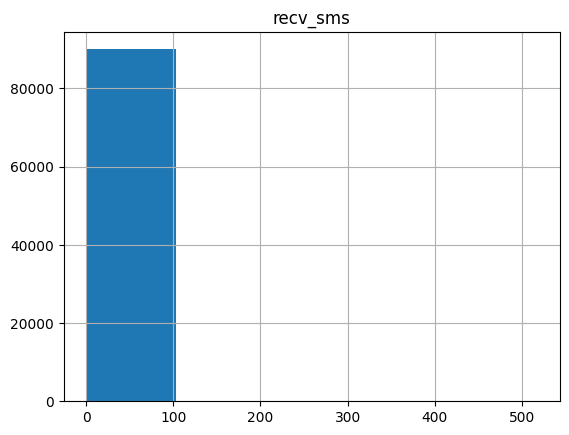

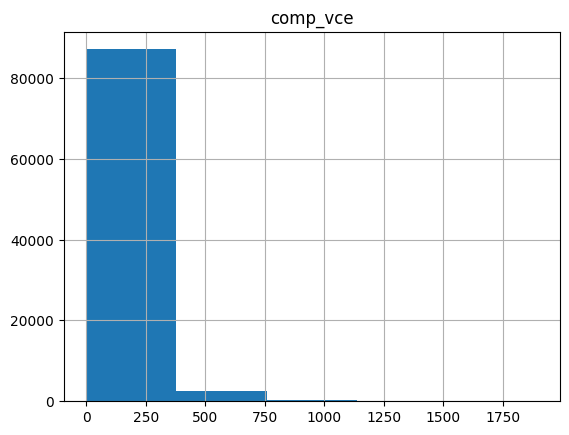

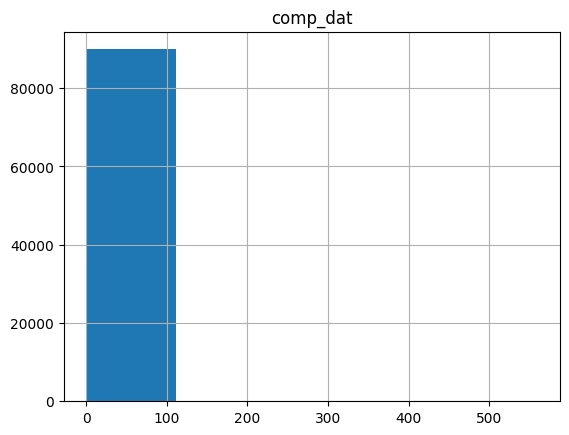

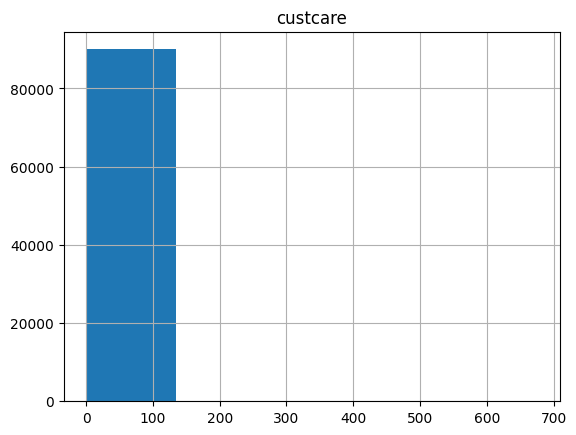

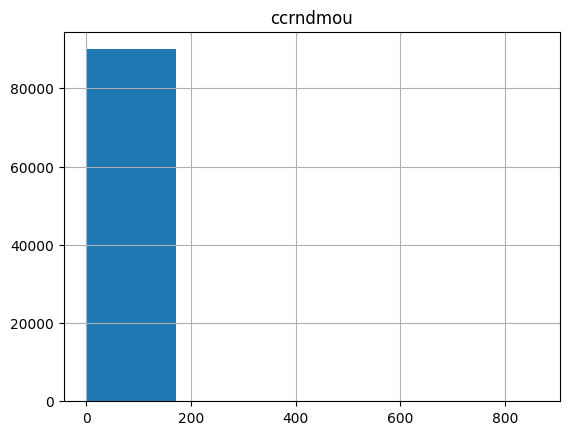

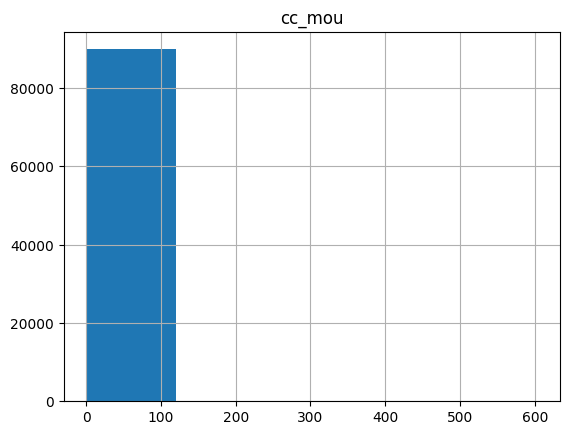

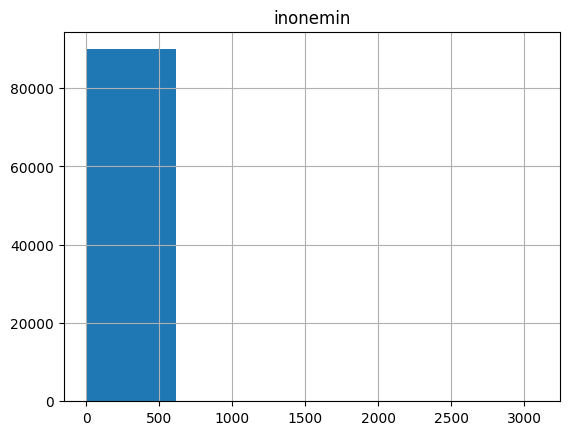

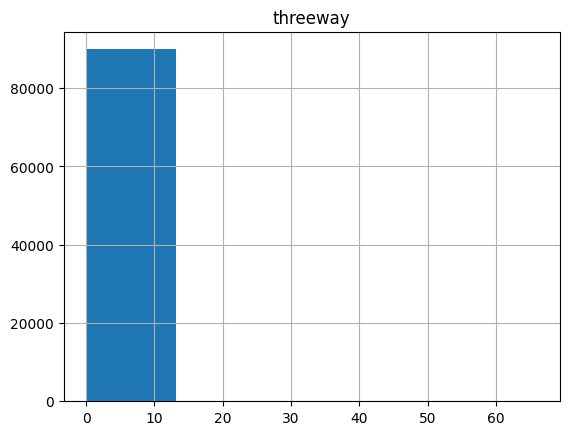

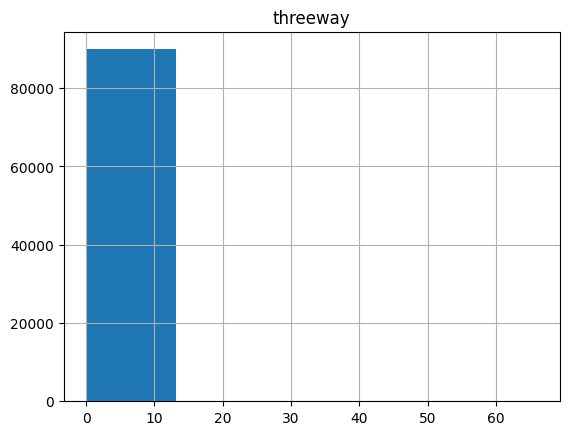

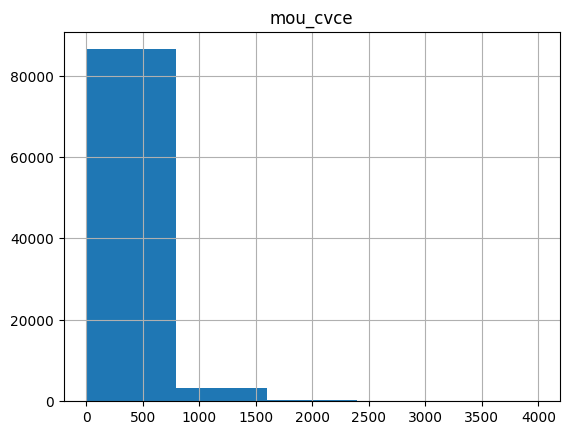

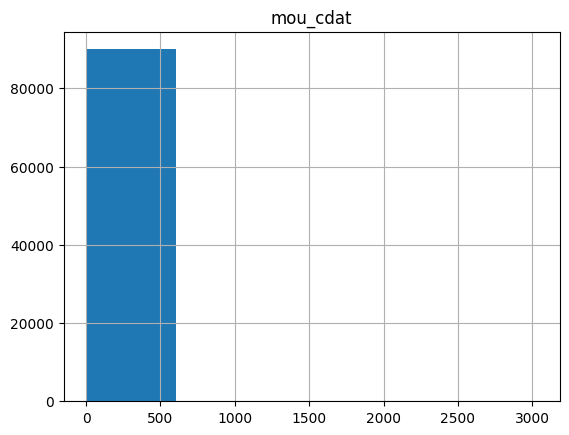

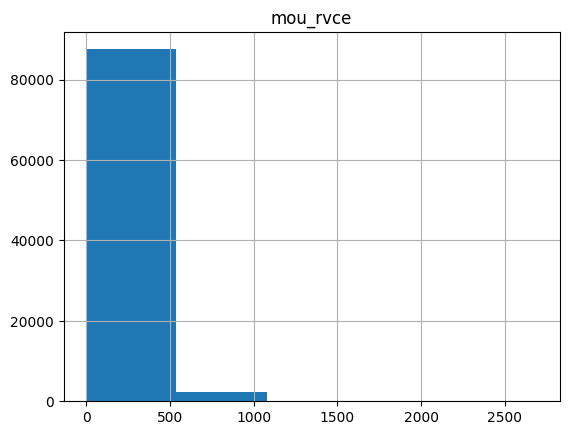

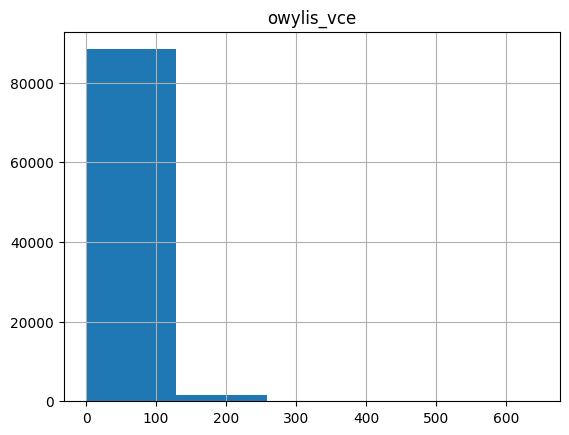

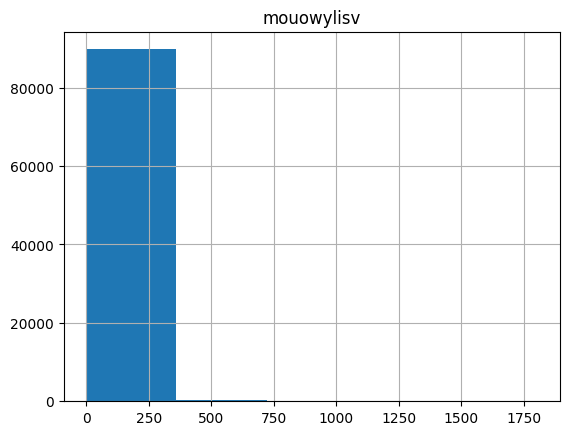

In [ ]:
for i in cols_a_revisar:
  print(df.hist(i, bins = 5))

In [ ]:
# hasta ahora las primeras 33 columnas : limpias

In [ ]:
var_dic.iloc[35,:]

Variable                                                 peak_vce
 Description     Mean number of inbound and outbound peak voic...
Name: 35, dtype: object

In [ ]:
var_dic.iloc[36,:]

Variable                               peak_dat
 Description     Mean number of peak data calls
Name: 36, dtype: object

In [ ]:
var_dic.iloc[37,:]

Variable                                                 mou_peav
 Description     Mean unrounded minutes of use of peak voice c...
Name: 37, dtype: object

In [ ]:
var_dic.iloc[38,:]

Variable                                                 mou_pead
 Description     Mean unrounded minutes of use of peak data calls
Name: 38, dtype: object

In [ ]:
var_dic.iloc[39,:]

Variable                                     opk_vce
 Description     Mean number of off-peak voice calls
Name: 39, dtype: object

In [ ]:
var_dic.iloc[40,:]

Variable                                    opk_dat
 Description     Mean number of off-peak data calls
Name: 40, dtype: object

In [ ]:
var_dic.iloc[41,:]

Variable                                                 mou_opkv
 Description     Mean unrounded minutes of use of off-peak voi...
Name: 41, dtype: object

In [ ]:
var_dic.iloc[42,:]

Variable                                                 mou_opkd
 Description     Mean unrounded minutes of use of off-peak dat...
Name: 42, dtype: object

In [ ]:
var_dic.iloc[43,:]

Variable                                        drop_blk
 Description     Mean number of dropped or blocked calls
Name: 43, dtype: object

In [ ]:
var_dic.iloc[44,:]

Variable                                attempt
 Description     Mean number of attempted calls
Name: 44, dtype: object

In [ ]:
var_dic.iloc[45,:]

Variable                               complete
 Description     Mean number of completed calls
Name: 45, dtype: object

In [ ]:
var_dic.iloc[46,:]

Variable                                     callfwdv
 Description     Mean number of call forwarding calls
Name: 46, dtype: object

In [ ]:
var_dic.iloc[47,:]

Variable                                  callwait
 Description     Mean number of call waiting calls
Name: 47, dtype: object

In [ ]:
var_dic.iloc[48,:]

Variable                                                    churn
 Description     Instance of churn between 31-60 days after ob...
Name: 48, dtype: object

In [ ]:
var_dic.iloc[49,:]

Variable                                    months
 Description     Total number of months in service
Name: 49, dtype: object

In [ ]:
var_dic.iloc[50,:]

Variable                                              uniqsubs
 Description     Number of unique subscribers in the household
Name: 50, dtype: object

In [ ]:
var_dic.iloc[51,:]

Variable                                          actvsubs
 Description     Number of active subscribers in household
Name: 51, dtype: object

In [ ]:
var_dic.iloc[52,:]

Variable                    new_cell
 Description     New cell phone user
Name: 52, dtype: object

In [ ]:
df['new_cell'].value_counts()

U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64

In [ ]:
var_dic.iloc[53,:]

Variable                  crclscod
 Description     Credit class code
Name: 53, dtype: object

In [ ]:
var_dic.iloc[54,:]

Variable                       asl_flag
 Description     Account spending limit
Name: 54, dtype: object

In [ ]:
var_dic.iloc[55,:]

Variable                                                 totcalls
 Description     Total number of calls over the life of the cu...
Name: 55, dtype: object

In [ ]:
var_dic.iloc[56,:]

Variable                                                totmou
 Description     Total minutes of use over the life of the cus
Name: 56, dtype: object

In [ ]:
var_dic.iloc[57,:]

Variable                totrev
 Description     Total revenue
Name: 57, dtype: object

In [ ]:
var_dic.iloc[58,:]

Variable                                                   adjrev
 Description     Billing adjusted total revenue over the life ...
Name: 58, dtype: object

In [ ]:
var_dic.iloc[59,:]

Variable                                                   adjmou
 Description     Billing adjusted total minutes of use over th...
Name: 59, dtype: object

In [ ]:
var_dic.iloc[60,:]

Variable                                                   adjqty
 Description     Billing adjusted total number of calls over t...
Name: 60, dtype: object

In [ ]:
var_dic.iloc[61,:]

Variable                                                   avgrev
 Description     Average monthly revenue over the life of the ...
Name: 61, dtype: object

In [ ]:
var_dic.iloc[62,:]

Variable                                                   avgmou
 Description     Average monthly minutes of use over the life ...
Name: 62, dtype: object

In [ ]:
var_dic.iloc[63,:]

Variable                                                   avgqty
 Description     Average monthly number of calls over the life...
Name: 63, dtype: object

In [ ]:
var_dic.iloc[64,:]

Variable                                                  avg3mou
 Description     Average monthly minutes of use over the previ...
Name: 64, dtype: object

In [ ]:
var_dic.iloc[65,:]

Variable                                                  avg3qty
 Description     Average monthly number of calls over the prev...
Name: 65, dtype: object

In [ ]:
var_dic.iloc[66,:]

Variable                                                  avg3rev
 Description     Average monthly revenue over the previous thr...
Name: 66, dtype: object

In [ ]:
df.isnull().sum()

rev            0
mou            0
totmrc         0
da             0
ovrmou         0
            ... 
kid6_10     1451
kid11_15    1451
kid16_17    1451
creditcd    1451
eqpdays        1
Length: 99, dtype: int64

Desde la Columna 33 a la 67 estan todas completas.
Continuamos analisis de 67 a 99.

In [ ]:
# columna 67 : avg6mou : Average monthly minutes of use over the previ

In [ ]:
var_dic.iloc[67,:]

Variable                                                  avg6mou
 Description     Average monthly minutes of use over the previ...
Name: 67, dtype: object

In [ ]:
#aca

array([[<Axes: title={'center': 'avg6mou'}>]], dtype=object)

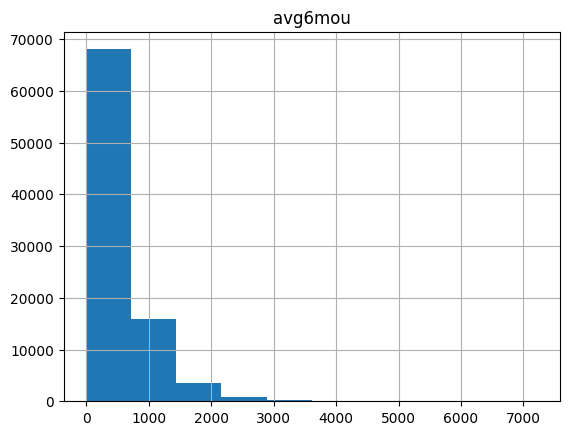

In [ ]:
df.hist('avg6mou')

In [ ]:
df['avg6mou'].isnull().sum()

1407

In [ ]:
df['avg6mou'].fillna(-999, inplace=True)

In [ ]:
df['avg6mou'].isnull().sum()

0

In [ ]:
# columna 68 : avg6qty : Average monthly number of calls over the prev

In [ ]:
var_dic.iloc[68,:]

Variable                                                  avg6qty
 Description     Average monthly number of calls over the prev...
Name: 68, dtype: object

array([[<Axes: title={'center': 'avg6qty'}>]], dtype=object)

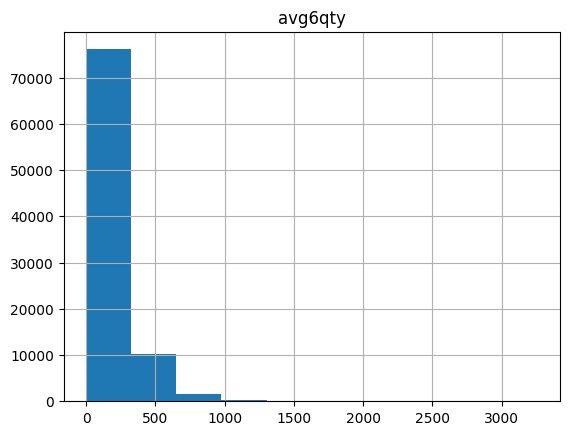

In [ ]:
df.hist('avg6qty')

In [ ]:
df['avg6qty'].isnull().sum()

1407

In [ ]:
df['avg6qty'].fillna(-999, inplace=True)

In [ ]:
df['avg6rev'].isnull().sum()

1407

In [ ]:
# columna 69: avg6rev : Average monthly revenue over the previous six

In [ ]:
var_dic.iloc[69,:]

Variable                                                  avg6rev
 Description     Average monthly revenue over the previous six...
Name: 69, dtype: object

array([[<Axes: title={'center': 'avg6rev'}>]], dtype=object)

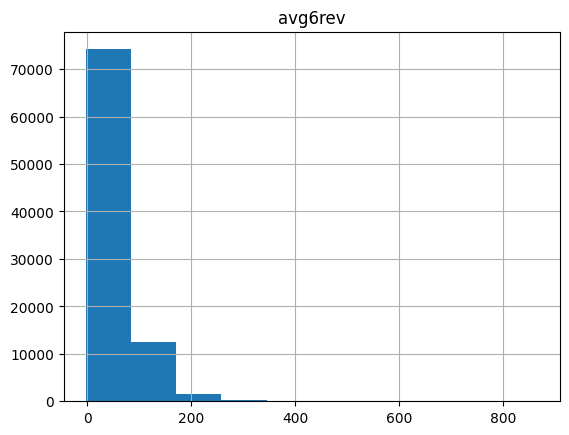

In [ ]:
df.hist('avg6rev')

In [ ]:
df['avg6rev'].isnull().sum()

1407

In [ ]:
df['avg6rev'].fillna(-999, inplace=True)

In [ ]:
df['avg6rev'].isnull().sum()

0

In [ ]:
#columna 70 : prizm_social_one : Social group letter only

In [ ]:
df['prizm_social_one'].value_counts()

S    29203
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64

In [ ]:
df['prizm_social_one'].isnull().sum()

6537

In [ ]:
df['prizm_social_one'].fillna('S', inplace=True)

In [ ]:
df['prizm_social_one'].value_counts()


S    35740
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64

In [ ]:
df['prizm_social_one'].isnull().sum()

0

In [ ]:
# columna 71 : area

In [ ]:
var_dic.iloc[71,:]

Variable                    area
 Description     Geogrpahic area
Name: 71, dtype: object

In [ ]:
df['area'].isnull().sum()

40

In [ ]:
df['area'].value_counts()

NEW YORK CITY AREA               10293
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
ATLANTIC SOUTH AREA               5526
CALIFORNIA NORTH AREA             5476
DALLAS AREA                       5106
NEW ENGLAND AREA                  5090
SOUTHWEST AREA                    5006
CHICAGO AREA                      4762
LOS ANGELES AREA                  4556
GREAT LAKES AREA                  4276
OHIO AREA                         4260
NORTHWEST/ROCKY MOUNTAIN AREA     4013
NORTH FLORIDA AREA                3996
CENTRAL/SOUTH TEXAS AREA          3962
HOUSTON AREA                      3887
SOUTH FLORIDA AREA                3119
TENNESSEE AREA                    2554
PHILADELPHIA AREA                 2263
Name: area, dtype: int64

In [ ]:
df['area'].fillna('NEW YORK CITY AREA', inplace=True)

In [ ]:
df['area'].value_counts()

NEW YORK CITY AREA               10333
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
ATLANTIC SOUTH AREA               5526
CALIFORNIA NORTH AREA             5476
DALLAS AREA                       5106
NEW ENGLAND AREA                  5090
SOUTHWEST AREA                    5006
CHICAGO AREA                      4762
LOS ANGELES AREA                  4556
GREAT LAKES AREA                  4276
OHIO AREA                         4260
NORTHWEST/ROCKY MOUNTAIN AREA     4013
NORTH FLORIDA AREA                3996
CENTRAL/SOUTH TEXAS AREA          3962
HOUSTON AREA                      3887
SOUTH FLORIDA AREA                3119
TENNESSEE AREA                    2554
PHILADELPHIA AREA                 2263
Name: area, dtype: int64

In [ ]:
df['area'].isnull().sum()

0

In [ ]:
city_areas = {
    'NEW YORK CITY AREA': 'Northeast',
    'DC/MARYLAND/VIRGINIA AREA': 'Mid-Atlantic',
    'MIDWEST AREA': 'Midwest',
    'ATLANTIC SOUTH AREA': 'Southeast',
    'CALIFORNIA NORTH AREA': 'West',
    'DALLAS AREA': 'Southwest',
    'NEW ENGLAND AREA': 'Northeast',
    'SOUTHWEST AREA': 'Southwest',
    'CHICAGO AREA': 'Midwest',
    'LOS ANGELES AREA': 'West',
    'GREAT LAKES AREA': 'Midwest',
    'OHIO AREA': 'Midwest',
    'NORTHWEST/ROCKY MOUNTAIN AREA': 'West',
    'NORTH FLORIDA AREA': 'Southeast',
    'CENTRAL/SOUTH TEXAS AREA': 'Southwest',
    'HOUSTON AREA': 'Southwest',
    'SOUTH FLORIDA AREA': 'Southeast',
    'TENNESSEE AREA': 'Southeast',
    'PHILADELPHIA AREA': 'Mid-Atlantic'
}

In [ ]:
df['area'] = df['area'].map(city_areas)

In [ ]:
df['area'].value_counts()

Midwest         19189
Southwest       17961
Northeast       15423
Southeast       15195
West            14045
Mid-Atlantic     8187
Name: area, dtype: int64

In [ ]:
# columna 72 : Dualband : capacidad de conectarse a las dos frecuencias utilizadas por las redes WiFi domésticas: 2,4 y 5 GHz.

In [ ]:
var_dic.iloc[72,:]

Variable         dualband
 Description     Dualband
Name: 72, dtype: object

In [ ]:
df['dualband'].value_counts()

Y    65977
N    20418
T     3413
U      191
Name: dualband, dtype: int64

In [ ]:
df['dualband'].isnull().sum()

1

In [ ]:
df['dualband'].fillna('Y', inplace=True)

In [ ]:
df['dualband'].isnull().sum()

0

In [ ]:
# columna 73 : refurb_new : Handset: refurbished or new

In [ ]:
var_dic.iloc[73, :]

Variable                          refurb_new
 Description     Handset: refurbished or new
Name: 73, dtype: object

In [ ]:
df['refurb_new'].value_counts()

N    76624
R    13375
Name: refurb_new, dtype: int64

In [ ]:
df['refurb_new'].isnull().sum()

1

In [ ]:
df['refurb_new'].fillna('N', inplace=True)

In [ ]:
df['refurb_new'].isnull().sum()

0

In [ ]:
# columna 74 : hnd_price : Current handset price

In [ ]:
var_dic.iloc[74,:]

Variable                     hnd_price
 Description     Current handset price
Name: 74, dtype: object

In [ ]:
df['hnd_price'].isnull().sum()

704

array([[<Axes: title={'center': 'hnd_price'}>]], dtype=object)

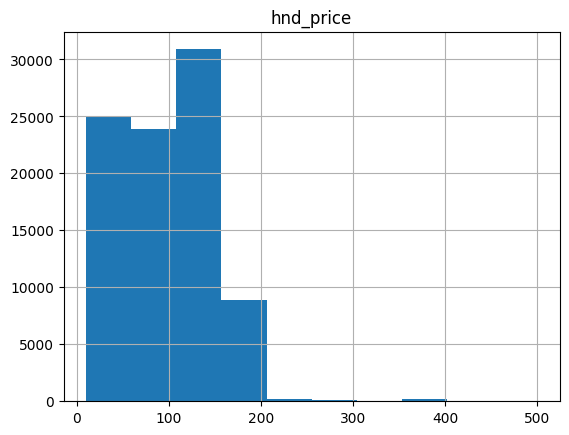

In [ ]:
df.hist('hnd_price')

In [ ]:
df['hnd_price'].fillna(-999, inplace=True)

In [ ]:
df['hnd_price'].isnull().sum()

0

In [ ]:
#columna 75 : phones : Number of handsets issued

In [ ]:
var_dic.iloc[75,:]

Variable                            phones
 Description     Number of handsets issued
Name: 75, dtype: object

In [ ]:
df['phones'].isnull().sum()

1

In [ ]:
df['phones'].value_counts()

1.0     50821
2.0     22503
3.0      8908
4.0      3989
5.0      1805
6.0       844
7.0       480
8.0       264
9.0       137
10.0      100
11.0       50
12.0       31
13.0       20
14.0       12
15.0        9
16.0        7
19.0        6
17.0        4
18.0        3
24.0        2
22.0        2
21.0        1
20.0        1
Name: phones, dtype: int64

In [ ]:
df['phones'].fillna(1.0, inplace=True)


In [ ]:
# columna 76 : models : Number of models issued

In [ ]:
var_dic.iloc[76,:]

Variable                          models
 Description     Number of models issued
Name: 76, dtype: object

In [ ]:
df['models'].describe()

count    89999.000000
mean         1.556184
std          0.900798
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: models, dtype: float64

array([[<Axes: title={'center': 'models'}>]], dtype=object)

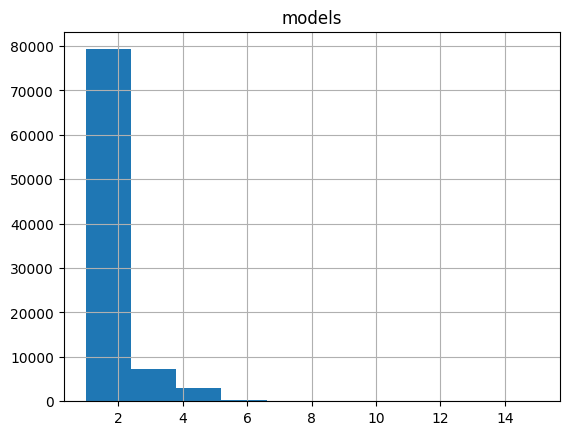

In [ ]:
df.hist('models')

In [ ]:
df['models'].isnull().sum()

1

In [ ]:
df['models'].fillna(1.0, inplace=True)


In [ ]:
df['models'].isnull().sum()

0

In [ ]:
#columna 77 : hnd_webcap : Handset web capability

In [ ]:
var_dic.iloc[77,:]

Variable                     hnd_webcap
 Description     Handset web capability
Name: 77, dtype: object

In [ ]:
df['hnd_webcap'].value_counts()

WCMB    67396
WC      12883
UNKW      202
Name: hnd_webcap, dtype: int64

In [ ]:
df['hnd_webcap'].isnull().sum()

9519

In [ ]:
df['hnd_webcap'].fillna('WCMB', inplace=True)

In [ ]:
df['hnd_webcap'].value_counts()


WCMB    76915
WC      12883
UNKW      202
Name: hnd_webcap, dtype: int64

In [ ]:
df['hnd_webcap'].isnull().sum()

0

In [ ]:
#columna 78 : truck :  Truck indicator

In [ ]:
var_dic.iloc[78, :]

Variable                   truck
 Description     Truck indicator
Name: 78, dtype: object

In [ ]:
df['truck'].value_counts()

0.0    71088
1.0    17461
Name: truck, dtype: int64

In [ ]:
df['truck'].isnull().sum()

1451

In [ ]:
df['truck'].fillna(0.0, inplace=True)

In [ ]:
df['truck'].value_counts()

0.0    72539
1.0    17461
Name: truck, dtype: int64

In [ ]:
df['truck'].isnull().sum()

0

In [ ]:
# columna 79 : rv :  RV indicator

In [ ]:
var_dic.iloc[79, :]

Variable                   rv
 Description     RV indicator
Name: 79, dtype: object

In [ ]:
df['rv'].value_counts()

0.0    80857
1.0     7692
Name: rv, dtype: int64

In [ ]:
df['rv'].isnull().sum()

1451

In [ ]:
df['rv'].fillna(0.0, inplace=True)

In [ ]:
df['rv'].value_counts()

0.0    82308
1.0     7692
Name: rv, dtype: int64

In [ ]:
# columna 80 : ownrent : Home owner/renter status

In [ ]:
var_dic.iloc[80,:]

Variable                          ownrent
 Description     Home owner/renter status
Name: 80, dtype: object

In [ ]:
df['ownrent'].value_counts()

O    58729
R     1780
Name: ownrent, dtype: int64

In [ ]:
df['ownrent'].isnull().sum() *100/len(df['ownrent'])

32.76777777777778

In [ ]:
df['ownrent'].notna().sum() *100/len(df['ownrent'])

67.23222222222222

In [ ]:
df['ownrent'].value_counts(normalize=True)

O    0.970583
R    0.029417
Name: ownrent, dtype: float64

In [ ]:
df['ownrent'].isnull().sum()

29491

In [ ]:
df['ownrent'].fillna('O', inplace=True)

In [ ]:
df['ownrent'].isnull().sum()

0

In [ ]:
# columna 81 : lor : Length of residence

In [ ]:
var_dic.iloc[81,:]

Variable                         lor
 Description     Length of residence
Name: 81, dtype: object

array([[<Axes: title={'center': 'lor'}>]], dtype=object)

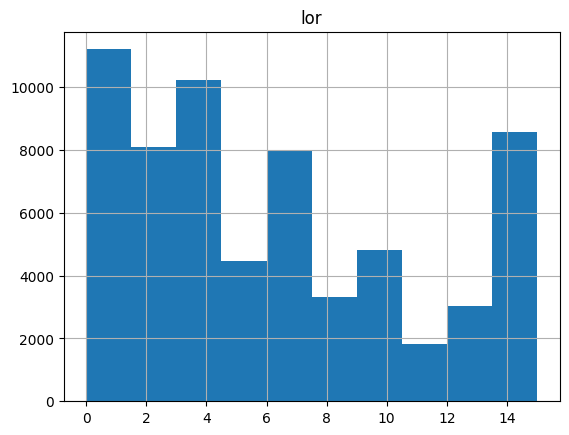

In [ ]:
df.hist('lor')

In [ ]:
df['lor'].isnull().sum() *100/len(df['lor'])

29.446666666666665

In [ ]:
df['lor'].fillna(-999, inplace=True)

In [ ]:
#columna 82 : dwlltype : Dwelling Unit type

In [ ]:
var_dic.iloc[82,:]

Variable                   dwlltype
 Description     Dwelling Unit type
Name: 82, dtype: object

In [ ]:
df['dwlltype'].value_counts()


S    44521
M    17501
Name: dwlltype, dtype: int64

In [ ]:
df['dwlltype'].isnull().sum()

27978

In [ ]:
df['dwlltype'].isnull().sum() * 100/len(df['dwlltype'])

31.086666666666666

In [ ]:
df['dwlltype'].value_counts(normalize=True)

S    0.717826
M    0.282174
Name: dwlltype, dtype: float64

In [ ]:
df_dwlltype_counts = df["dwlltype"].value_counts()

# Calcular la proporción de cada color en relación con el total de colores no nulos
total_non_null = df_dwlltype_counts.sum()
proportions = df_dwlltype_counts / total_non_null

# Calcular el número de nulos que se asignará a cada color
total_nulls = df["dwlltype"].isnull().sum()

# Manejar el caso cuando no hay valores nulos
if total_nulls == 0:
    print("No hay valores nulos en la columna 'color'.")
else:
    nulls_per_dwlltype = np.round(proportions * total_nulls).astype(int)

    # Distribuir los nulos proporcionalmente en los colores existentes
    null_indices = df[df["dwlltype"].isnull()].index
    dwlltype = nulls_per_dwlltype.index.to_list()
    weights = nulls_per_dwlltype.values / nulls_per_dwlltype.sum()
    replacement_dwlltype = np.random.choice(dwlltype, size=len(null_indices), p=weights)
    df.loc[null_indices, "dwlltype"] = replacement_dwlltype

In [ ]:
df['dwlltype'].value_counts()

S    64620
M    25380
Name: dwlltype, dtype: int64

In [ ]:
#columna 83 : marital : marital status

In [ ]:
var_dic.iloc[83,:]

Variable                marital
 Description     Marital Status
Name: 83, dtype: object

In [ ]:
df['marital'].value_counts()

U    33050
M    28419
S    15951
B     6391
A     4738
Name: marital, dtype: int64

In [ ]:
df['marital'].isnull().sum()

1451

In [ ]:
df['marital'].value_counts()

U    33050
M    28419
S    15951
B     6391
A     4738
Name: marital, dtype: int64

In [ ]:
df['marital'].fillna('U', inplace=True)


In [ ]:
df['marital'].isnull().sum()

0

In [ ]:
#columna 84 : adults : Number of adults in household

In [ ]:
var_dic.iloc[84,: ]

Variable                                adults
 Description     Number of adults in household
Name: 84, dtype: object

In [ ]:
df['adults'].value_counts()

2.0    21022
1.0    20041
3.0    12443
4.0     8089
5.0     4412
6.0     3960
Name: adults, dtype: int64

In [ ]:
df['adults'].isnull().sum()

20033

In [ ]:
# Assuming you have already loaded the DataFrame "df" containing the "adults" column

# Calculate the counts of each category in the "adults" column
df_adults_counts = df["adults"].value_counts()

# Calculate the proportion of each category in relation to the total non-null categories
total_non_null = df_adults_counts.sum()
proportions = df_adults_counts / total_non_null

# Calculate the number of missing values that will be assigned to each category
total_nulls = df["adults"].isnull().sum()

# Handle the case when there are no missing values
if total_nulls == 0:
    print("No hay valores nulos en la columna 'adults'.")
else:
    nulls_per_adults = np.round(proportions * total_nulls).astype(int)

    # Distribute the missing values proportionally among the existing categories
    null_indices = df[df["adults"].isnull()].index
    adults = nulls_per_adults.index.to_list()
    weights = nulls_per_adults.values / nulls_per_adults.sum()
    replacement_adults = np.random.choice(adults, size=len(null_indices), p=weights)
    df.loc[null_indices, "adults"] = replacement_adults


In [ ]:
df['adults'].isnull().sum()

0

In [ ]:
df['adults'].value_counts()

2.0    27005
1.0    25872
3.0    16008
4.0    10386
5.0     5619
6.0     5110
Name: adults, dtype: int64

In [ ]:
# columna 85 : infobase : InfoBase match

In [ ]:
var_dic.iloc[85,:]

Variable               infobase
 Description     InfoBase match
Name: 85, dtype: object

In [ ]:
df['infobase'].value_counts()

M    70597
Name: infobase, dtype: int64

In [ ]:
df['infobase'].isnull().sum()*100/len(df['infobase'])


21.558888888888887

In [ ]:
df['infobase'].fillna('M', inplace=True)

In [ ]:
df['infobase'].isnull().sum()


0

In [ ]:
# columna 86 : income : Estimated income

In [ ]:
var_dic.iloc[86,:]

Variable                   income
 Description     Estimated income
Name: 86, dtype: object

In [ ]:
df['income'].isnull().sum()

22196

array([[<Axes: title={'center': 'income'}>]], dtype=object)

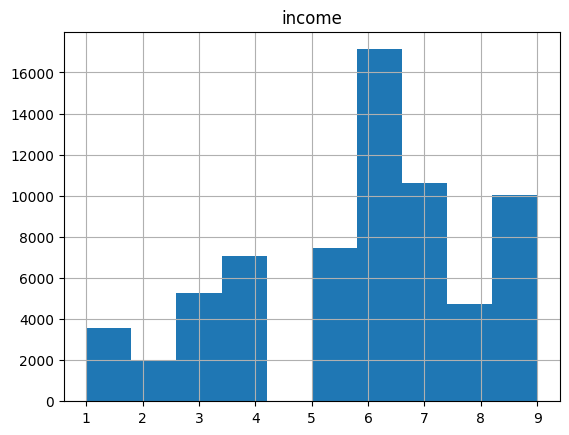

In [ ]:
df.hist('income')

In [ ]:
df['income'].describe()

count    67804.000000
mean         5.809274
std          2.176928
min          1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: income, dtype: float64

In [ ]:
df['income'].fillna(-999, inplace=True)

In [ ]:
df['income'].isnull().sum()

0

In [ ]:
#columna 87 : numbcars :  Known number of vehicles

In [ ]:
var_dic.iloc[87,:]

Variable                         numbcars
 Description     Known number of vehicles
Name: 87, dtype: object

In [ ]:
df['numbcars'].value_counts()

1.0    23488
2.0    19473
3.0     3471
Name: numbcars, dtype: int64

In [ ]:
df['numbcars'].fillna(-999.00, inplace=True)

In [ ]:
df['numbcars'].isnull().sum()

0

In [ ]:
#columna 88 : HHstatin : Premier household status indicator

In [ ]:
var_dic.iloc[88, :]

Variable                                   HHstatin
 Description     Premier household status indicator
Name: 88, dtype: object

In [ ]:
df['HHstatin'].value_counts()

C    36093
I    11385
A     4194
B     2908
G     1558
H      830
Name: HHstatin, dtype: int64

In [ ]:
df['HHstatin'].isnull().sum() * 100/len(df['HHstatin'])

36.702222222222225

In [ ]:

# Assuming you have already loaded the DataFrame "df" containing the "HHstatin" column

# Calculate the counts of each category in the "HHstatin" column
df_HHstatin_counts = df["HHstatin"].value_counts()

# Calculate the proportion of each category in relation to the total non-null categories
total_non_null = df_HHstatin_counts.sum()
proportions = df_HHstatin_counts / total_non_null

# Calculate the number of missing values that will be assigned to each category
total_nulls = df["HHstatin"].isnull().sum()

# Handle the case when there are no missing values
if total_nulls == 0:
    print("No hay valores nulos en la columna 'HHstatin'.")
else:
    nulls_per_category = np.round(proportions * total_nulls).astype(int)

    # Distribute the missing values proportionally among the existing categories
    null_indices = df[df["HHstatin"].isnull()].index
    categories = nulls_per_category.index.to_list()
    weights = nulls_per_category.values / nulls_per_category.sum()
    replacement_HHstatin = np.random.choice(categories, size=len(null_indices), p=weights)
    df.loc[null_indices, "HHstatin"] = replacement_HHstatin


In [ ]:
df['HHstatin'].isnull().sum()

0

In [ ]:
# columna 89 : dwllsize : Dwelling size

In [ ]:
var_dic.iloc[89, :]

Variable              dwllsize
 Description     Dwelling size
Name: 89, dtype: object

In [ ]:
df['dwllsize'].value_counts()

A    43118
B     4743
C     1357
J     1280
O     1079
N      905
D      678
K      595
E      490
L      449
F      373
M      344
G      319
H      265
I      241
Name: dwllsize, dtype: int64

In [ ]:
df['dwllsize'].isnull().sum()

33764

In [ ]:
df['dwllsize'].isnull().sum() * 100/len(df['dwllsize'])

37.51555555555556

In [ ]:
df['dwllsize'].value_counts(normalize=True)

A    0.766733
B    0.084341
C    0.024130
J    0.022761
O    0.019187
N    0.016093
D    0.012056
K    0.010580
E    0.008713
L    0.007984
F    0.006633
M    0.006117
G    0.005673
H    0.004712
I    0.004286
Name: dwllsize, dtype: float64

In [ ]:
df['dwllsize'].fillna('A', inplace=True)

In [ ]:
# columna 90 : forgntvl : Foreign travel dummy variable

In [ ]:
var_dic.iloc[90, :]

Variable                              forgntvl
 Description     Foreign travel dummy variable
Name: 90, dtype: object

In [ ]:
df['forgntvl'].isnull().sum()

1451

In [ ]:
df['forgntvl'].value_counts()

0.0    83302
1.0     5247
Name: forgntvl, dtype: int64

In [ ]:
df['forgntvl'].fillna(0.0, inplace=True)

In [ ]:
df['forgntvl'].value_counts()

0.0    84753
1.0     5247
Name: forgntvl, dtype: int64

In [ ]:
# columna 91 : ethnic : Ethnicity roll-up code

In [ ]:
var_dic.iloc[91, :]

Variable                         ethnic
 Description     Ethnicity roll-up code
Name: 91, dtype: object

In [ ]:
df['ethnic'].value_counts()

N    30400
H    11971
S    11624
U     9977
G     5456
Z     3980
O     3811
I     3509
J     2622
F     1940
B     1279
R      947
D      800
M      137
P       92
X        4
Name: ethnic, dtype: int64

In [ ]:
df['ethnic'].isnull().sum()

1451

In [ ]:
df['ethnic'].fillna('N', inplace=True)

In [ ]:
df['ethnic'].isnull().sum()

0

In [ ]:
#columna 92 : kid0_2 : Child 0 - 2 years of age in household

In [ ]:
var_dic.iloc[92,:]

Variable                                        kid0_2
 Description     Child 0 - 2 years of age in household
Name: 92, dtype: object

In [ ]:
df['kid0_2'].value_counts()

U    84938
Y     3611
Name: kid0_2, dtype: int64

In [ ]:
df['kid0_2'].isnull().sum()

1451

In [ ]:
df['kid0_2'].fillna('U', inplace=True)


In [ ]:
df['kid0_2'].isnull().sum()

0

In [ ]:
#columna : 93 : kid3_5 : Child 3 - 5 years of age in household

In [ ]:
var_dic.iloc[93,:]

Variable                                        kid3_5
 Description     Child 3 - 5 years of age in household
Name: 93, dtype: object

In [ ]:
df['kid3_5'].value_counts()

U    84308
Y     4241
Name: kid3_5, dtype: int64

In [ ]:
df['kid3_5'].isnull().sum()

1451

In [ ]:
df['kid3_5'].fillna('U', inplace=True)

In [ ]:
df['kid3_5'].isnull().sum()

0

In [ ]:
# columna 94 :  kid6_10 : Child 6 - 10 years of age in household

In [ ]:
var_dic.iloc[94, :]

Variable                                        kid6_10
 Description     Child 6 - 10 years of age in household
Name: 94, dtype: object

In [ ]:
df['kid6_10'].value_counts()

U    81196
Y     7353
Name: kid6_10, dtype: int64

In [ ]:
df['kid6_10'].isnull().sum()

1451

In [ ]:
df['kid6_10'].fillna('U', inplace=True)

In [ ]:
df['kid6_10'].isnull().sum()

0

In [ ]:
# columna 95 : kid11_15 : Child 11 - 15 years of age in household

In [ ]:
var_dic.iloc[95, :]

Variable                                        kid11_15
 Description     Child 11 - 15 years of age in household
Name: 95, dtype: object

In [ ]:
df['kid11_15'].value_counts()

U    80497
Y     8052
Name: kid11_15, dtype: int64

In [ ]:
df['kid11_15'].isnull().sum()

1451

In [ ]:
df['kid11_15'].fillna('U', inplace=True)

In [ ]:
df['kid11_15'].isnull().sum()

0

In [ ]:
# columna 96 : kid16_17 : Child 16 - 17 years of age in household

In [ ]:
var_dic.iloc[96, :]

Variable                                        kid16_17
 Description     Child 16 - 17 years of age in household
Name: 96, dtype: object

In [ ]:
df['kid16_17'].value_counts()

U    79419
Y     9130
Name: kid16_17, dtype: int64

In [ ]:
df['kid16_17'].isnull().sum()

1451

In [ ]:
df['kid16_17'].fillna('U', inplace=True)

In [ ]:
df['kid16_17'].isnull().sum()

0

In [ ]:
# columna 97 :  creditcd : Credit card indicator

In [ ]:
var_dic.iloc[97, :]

Variable                      creditcd
 Description     Credit card indicator
Name: 97, dtype: object

In [ ]:
df['creditcd'].value_counts()

Y    61716
N    26833
Name: creditcd, dtype: int64

In [ ]:
df['creditcd'].isnull().sum()

1451

In [ ]:
df['creditcd'].fillna('Y', inplace=True)

In [ ]:
sevan_ = df[df['eqpdays'] <=0].index

In [ ]:
df.drop(sevan_, inplace = True)

In [ ]:
df['eqpdays'].describe()

count    89874.000000
mean       402.981897
std        252.546850
min          1.000000
25%        227.000000
50%        360.000000
75%        548.000000
max       1812.000000
Name: eqpdays, dtype: float64

In [ ]:
# columna 98 : eqpdays : Number of days (age) of current equipment

In [ ]:
var_dic.iloc[98, :]

Variable                                           eqpdays
 Description     Number of days (age) of current equipment
Name: 98, dtype: object

array([[<Axes: title={'center': 'eqpdays'}>]], dtype=object)

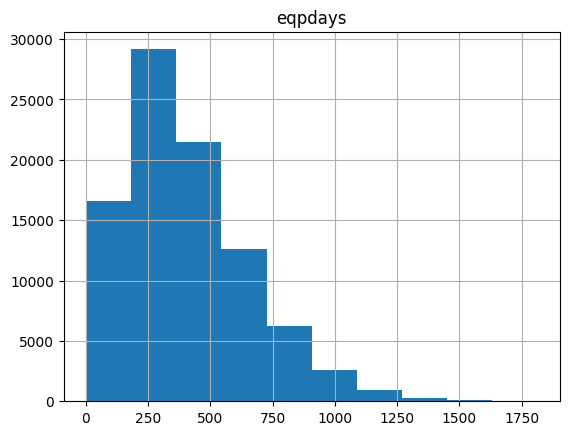

In [ ]:
df.hist('eqpdays')

In [ ]:
df['eqpdays'].isnull().sum()

1

In [ ]:
df['eqpdays'].fillna(-999, inplace=True)

In [ ]:
df['eqpdays'].isnull().sum()

0

In [ ]:
# columna 99 : Customer_ID

In [ ]:
var_dic.iloc[99,:]

Variable                       Customer_ID
 Description     Customer ID (Primary key)
Name: 99, dtype: object

Haasta aqui, todas las variables revisadas e imputadas.

In [ ]:
 # Check duplicados - NO hay duplicados
len(df.index.unique())==len(df.index)

True

In [ ]:
df.shape

(89875, 99)

In [ ]:
# df_recuperacion = pd.read_pickle("/conte")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89875 entries, 1000001 to 1090000
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89875 non-null  float64
 1   mou               89875 non-null  float64
 2   totmrc            89875 non-null  float64
 3   da                89875 non-null  float64
 4   ovrmou            89875 non-null  float64
 5   ovrrev            89875 non-null  float64
 6   vceovr            89875 non-null  float64
 7   datovr            89875 non-null  float64
 8   roam              89875 non-null  float64
 9   change_mou        89875 non-null  float64
 10  change_rev        89875 non-null  float64
 11  drop_vce          89875 non-null  float64
 12  drop_dat          89875 non-null  float64
 13  blck_vce          89875 non-null  float64
 14  blck_dat          89875 non-null  float64
 15  unan_vce          89875 non-null  float64
 16  unan_dat          89875 non-null

In [ ]:
df.shape

(89875, 99)

In [ ]:
if df.isnull().sum().any() == False:

  print('El dataset no contiene nulos a imputar')

El dataset no contiene nulos a imputar


Hacemos correlacion para revisar si hay variables que explican lo mismo (alta correlacion) o bien, no aportan a la resolucion del problema

In [ ]:
corr = df.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
del(df["infobase"])

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0


In [ ]:
target= ["churn"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
l_num,l_bool,l_cat=obtener_lista_variables(df)


In [ ]:
for i in l_bool:
  if i in df:
    df[i+"_bool"]=df[i].astype(int)

In [ ]:
for column in l_bool:
    if column in df:
        df = df.drop(column, axis=1)

In [ ]:
l_num_2,l_bool_2,l_cat_2 =obtener_lista_variables(df)


In [ ]:
l_num_2

['rev',
 'mou',
 'totmrc',
 'da',
 'ovrmou',
 'ovrrev',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'drop_vce',
 'drop_dat',
 'blck_vce',
 'blck_dat',
 'unan_vce',
 'unan_dat',
 'plcd_vce',
 'plcd_dat',
 'recv_vce',
 'recv_sms',
 'comp_vce',
 'comp_dat',
 'custcare',
 'ccrndmou',
 'cc_mou',
 'inonemin',
 'threeway',
 'mou_cvce',
 'mou_cdat',
 'mou_rvce',
 'owylis_vce',
 'mouowylisv',
 'iwylis_vce',
 'mouiwylisv',
 'peak_vce',
 'peak_dat',
 'mou_peav',
 'mou_pead',
 'opk_vce',
 'opk_dat',
 'mou_opkv',
 'mou_opkd',
 'drop_blk',
 'attempt',
 'complete',
 'callfwdv',
 'callwait',
 'months',
 'uniqsubs',
 'actvsubs',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 'avg3qty',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'phones',
 'models',
 'lor',
 'adults',
 'income',
 'numbcars',
 'eqpdays']

In [ ]:
l_bool_2

['truck_bool', 'rv_bool', 'forgntvl_bool']

In [ ]:
l_cat_2

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
df = pd.get_dummies(data=df, columns=l_cat_2)

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]

In [ ]:
X = df[features]

In [ ]:
y = df[target]

In [ ]:
df.shape

(89875, 215)

In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida

def highly_correlated(df, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = df.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(df[i])) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(df[i])) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(df,0.95)
highly_corr


,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,vceovr,ovrrev,0.998128,1.0,1.0,ovrrev
1,datovr,da,0.995555,1.0,1.0,da
2,comp_vce,plcd_vce,0.985658,1.0,1.0,plcd_vce
3,comp_dat,plcd_dat,0.990562,1.0,1.0,plcd_dat
4,cc_mou,ccrndmou,0.988694,1.0,1.0,ccrndmou
5,inonemin,recv_vce,0.966007,1.0,1.0,recv_vce
6,mou_opkd,mou_cdat,0.960036,1.0,1.0,mou_cdat
7,attempt,plcd_vce,0.998548,1.0,1.0,plcd_vce
8,attempt,comp_vce,0.984283,1.0,1.0,comp_vce
9,complete,plcd_vce,0.983641,1.0,1.0,plcd_vce


In [ ]:
drop_cols = list(highly_corr['F_to_delete'])

In [ ]:
df.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['ovrrev', 'da', 'plcd_vce', 'plcd_dat', 'ccrndmou', 'recv_vce', 'mou_cdat', 'plcd_vce', 'comp_vce', 'plcd_vce', 'comp_vce', 'attempt', 'totrev', 'totmou', 'totcalls', 'mou', 'asl_flag_N', 'refurb_new_N', 'dualband_U', 'hnd_webcap_WC', 'ownrent_O', 'dwlltype_M', 'kid0_2_U', 'kid3_5_U', 'kid6_10_U', 'kid11_15_U', 'kid16_17_U', 'creditcd_N']


In [ ]:
df.shape

(89875, 190)

In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]

In [ ]:
X2 = df[features]

In [ ]:
y2 = df[target]

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X2.shape

(89875, 189)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89875 entries, 1000001 to 1090000
Columns: 189 entries, rev to creditcd_Y
dtypes: float64(54), int64(10), uint8(125)
memory usage: 57.3 MB


In [ ]:
vt = VarianceThreshold(threshold = 0.01)


In [ ]:
vt.fit(X2)

VarianceThreshold(threshold=0.01)

In [ ]:
cols_lowvar = X2.columns[vt.get_support()==False]

In [ ]:
X2.drop(columns=cols_lowvar,inplace=True)
print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())


60  low variance features were removed:
 ['crclscod_A2', 'crclscod_A3', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D2', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_E4', 'crclscod_EC', 'crclscod_EF', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_IF', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_S', 'crclscod_TP', 'crclscod_U', 'crclscod_U1', 'crclscod_V', 'crclscod_V1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z4', 'crclscod_Z5', 'crclscod_ZF', 'crclscod_ZY', 'hnd_webcap_UNKW', 'dwllsize_D', 'dwllsize_E', 'dwllsize_F', 'dwllsize_G', 'dwllsize_H', 'dwllsize_I', 'dwllsize_K', 'dwllsize_L', 'dwllsize_M', 'dwllsize_N', 'ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [ ]:
X2.shape

(89875, 129)

In [ ]:
df.shape


(89875, 190)

In [ ]:
y2.shape

(89875,)

# Guardar clean data

In [ ]:
pd.to_pickle(df,'/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/ df_limpio_completo_Preprocessing_Final_ML_PK')

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
df_recuperacion=pd.read_pickle('/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/ df_limpio_completo_Preprocessing_Final_ML_PK')

In [ ]:
df.head(2)

,rev,totmrc,ovrmou,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,...,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,22.500,0.00,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,...,0,0,0,0,0,0,0,0,0,1
1000002,57.4925,37.425,22.75,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.shape

(89875, 190)

In [ ]:
df['churn']

Customer_ID
1000001    1
1000002    0
1000003    1
1000004    0
1000005    0
          ..
1089996    0
1089997    0
1089998    1
1089999    0
1090000    0
Name: churn, Length: 89875, dtype: int64